Time Series Forecasting Project

Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("Rose.csv",parse_dates=True,index_col=0)
df = pd.DataFrame(df)

In [4]:
df

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


In [5]:
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [6]:
df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [7]:
df.shape

(187, 1)

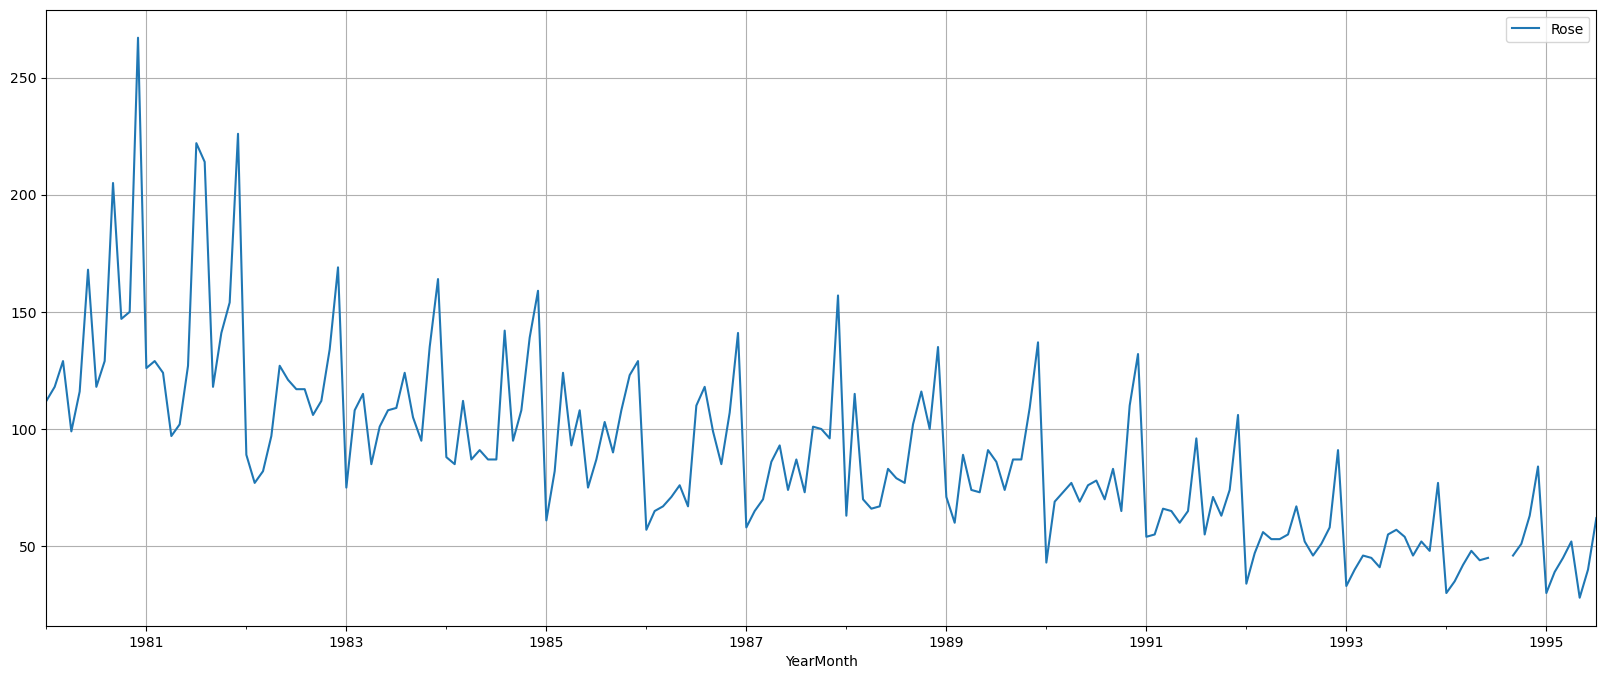

In [8]:
df.plot(figsize=(20,8))
plt.grid();

In [9]:
df['Year']=df.index.year
df['Month']=df.index.month
df.head()

,Rose,Year,Month
YearMonth,,,
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


In [10]:
df.columns=['Sales', 'Year', 'Month']
df.head()

,Sales,Year,Month
YearMonth,,,
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


In [11]:
df.tail()

,Sales,Year,Month
YearMonth,,,
1995-03-01,45.0,1995,3
1995-04-01,52.0,1995,4
1995-05-01,28.0,1995,5
1995-06-01,40.0,1995,6
1995-07-01,62.0,1995,7


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   185 non-null    float64
 1   Year    187 non-null    int32  
 2   Month   187 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 4.4 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,185.0,90.394595,39.175344,28.0,63.0,86.0,112.0,267.0
Year,187.0,1987.299465,4.514749,1980.0,1983.0,1987.0,1991.0,1995.0
Month,187.0,6.406417,3.450972,1.0,3.0,6.0,9.0,12.0


In [14]:
df.isnull().sum()

Sales    2
Year     0
Month    0
dtype: int64

In [15]:
df[df['Sales'].isna()]

,Sales,Year,Month
YearMonth,,,
1994-07-01,NaN,1994,7
1994-08-01,NaN,1994,8


In [16]:
df['Sales_Before_After_Mean']=df['Sales']

In [17]:
df.loc['1994-07-01', 'Sales_Before_After_Mean']=np.mean(
    df[df.Month==7]['1993-07-01':'1995-07-01']['Sales'])
df.loc['1994-08-01', 'Sales_Before_After_Mean']=np.mean(
    df[df.Month==8]['1993-08-01':'1995-08-01']['Sales'])

df[df['Sales_Before_After_Mean'].isna()]

,Sales,Year,Month,Sales_Before_After_Mean
YearMonth,,,,


In [18]:
df.loc['1994-07-01':'1994-08-01']

,Sales,Year,Month,Sales_Before_After_Mean
YearMonth,,,,
1994-07-01,NaN,1994,7,59.5
1994-08-01,NaN,1994,8,54.0


In [19]:
df.drop(['Sales'],inplace=True,axis=1)

df.head()

,Year,Month,Sales_Before_After_Mean
YearMonth,,,
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0


In [20]:
df.columns=['Year', 'Month', 'Sales']
df.isnull().sum()

Year     0
Month    0
Sales    0
dtype: int64

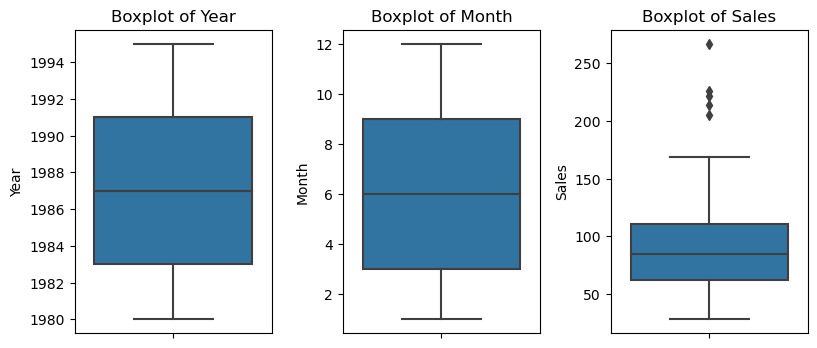

In [21]:
dfbox=df
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

<Axes: xlabel='YearMonth'>

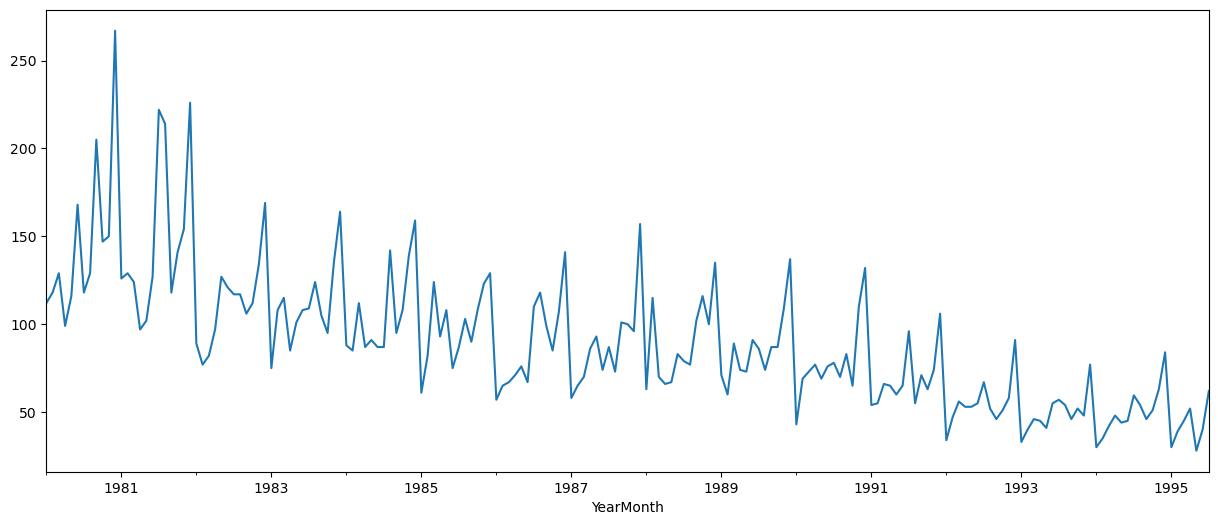

In [22]:
plt.figure(figsize=(15,6))
df['Sales'].plot()

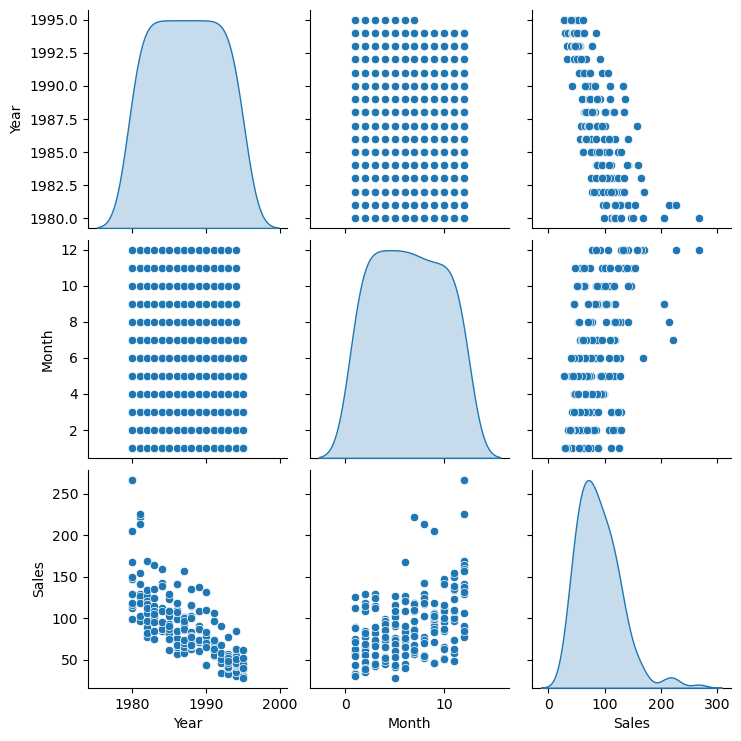

In [23]:
sns.pairplot(df, diag_kind='kde')  

<Axes: xlabel='Year', ylabel='Sales'>

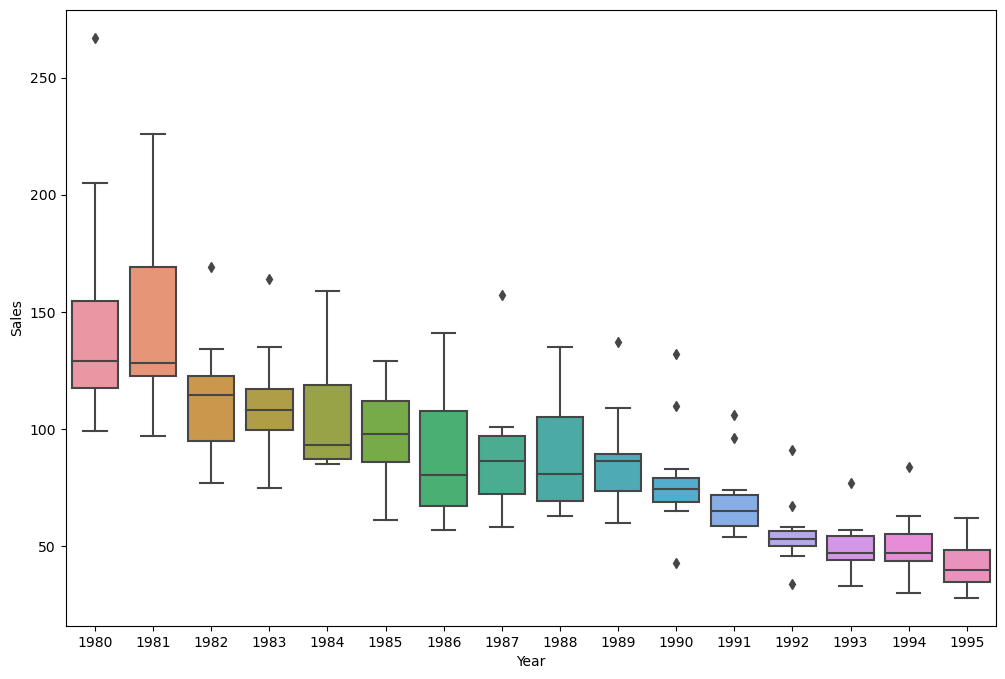

In [24]:
plt.figure(figsize = (12,8))

sns.boxplot(data=df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

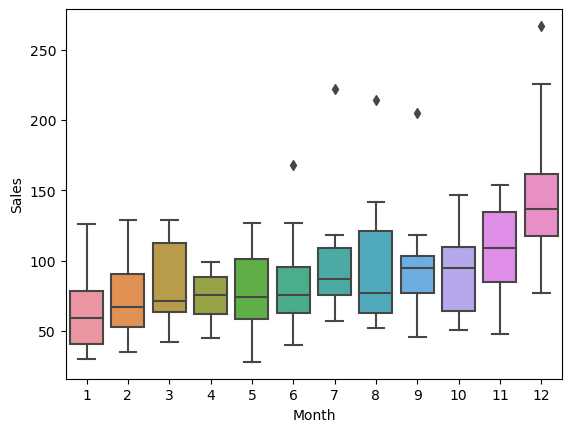

In [25]:
sns.boxplot(data= df, x='Month',y='Sales')

In [26]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = 'Month', index = 'Year')
monthly_sales_across_years

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


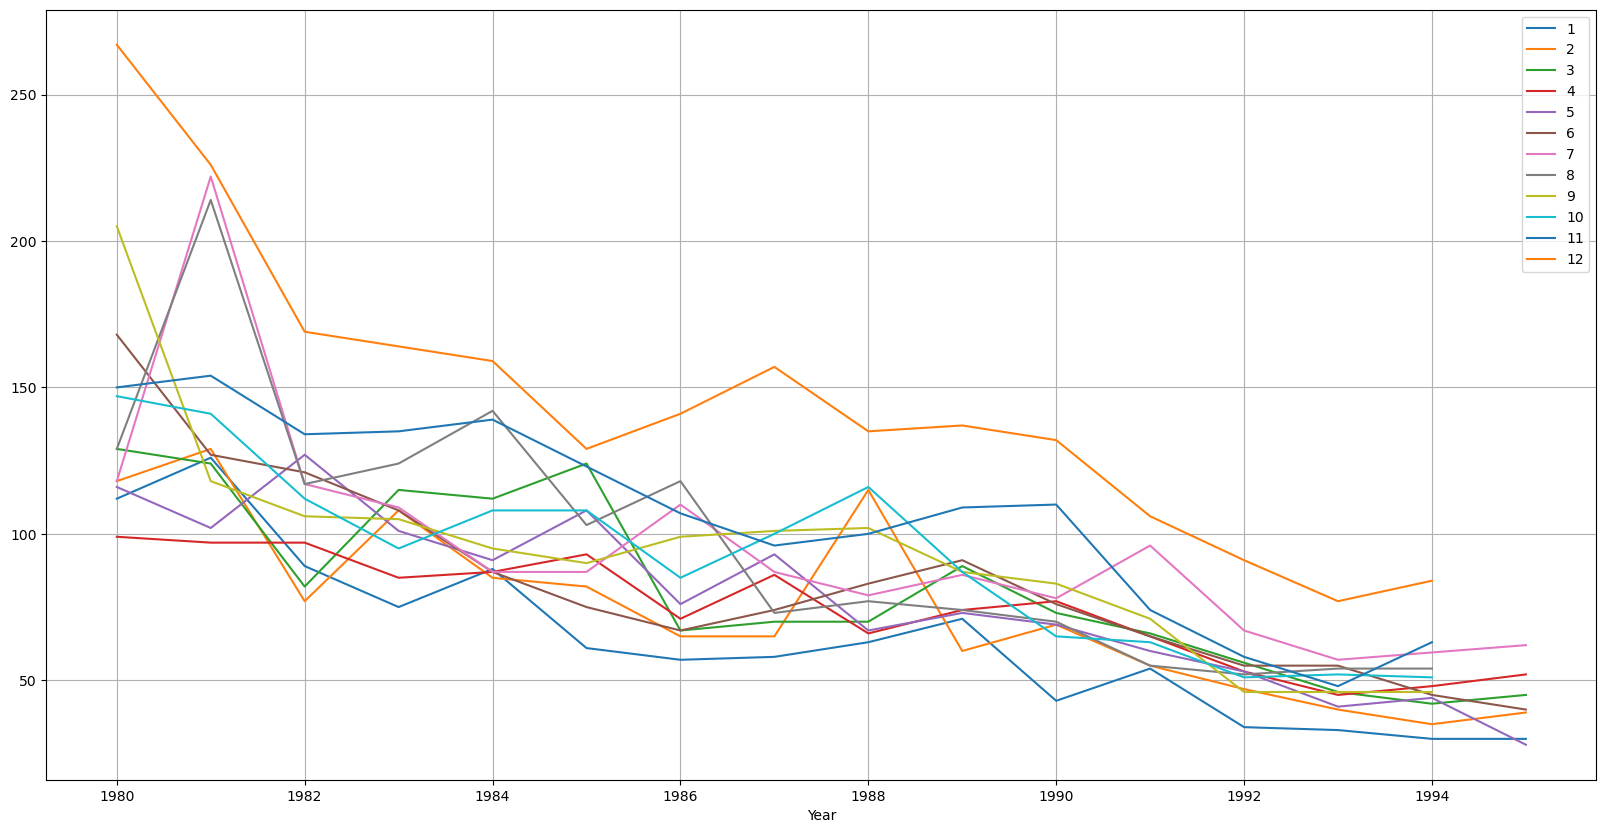

In [27]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

In [28]:
yearly_sales_across_months = pd.pivot_table(df, values = 'Sales', columns = 'Year', index = 'Month')
yearly_sales_across_months

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
1,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.0,30.0
2,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.0,39.0
3,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.0,45.0
4,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.0,52.0
5,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.0,28.0
6,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.0,40.0
7,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,59.5,62.0
8,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,54.0,NaN
9,205.0,118.0,106.0,105.0,95.0,90.0,99.0,101.0,102.0,87.0,83.0,71.0,46.0,46.0,46.0,NaN


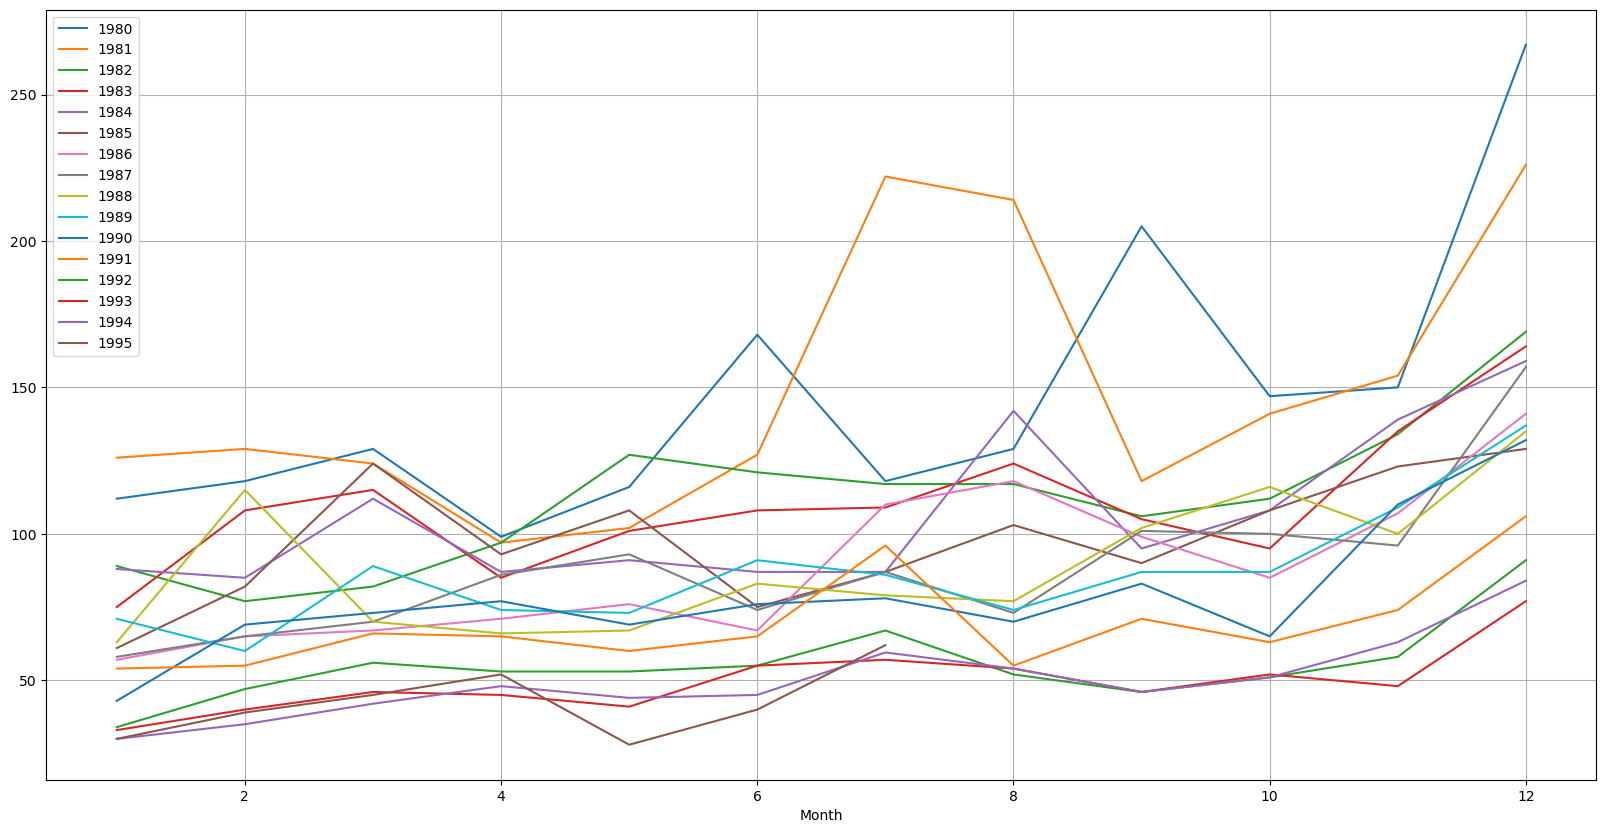

In [29]:
yearly_sales_across_months.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

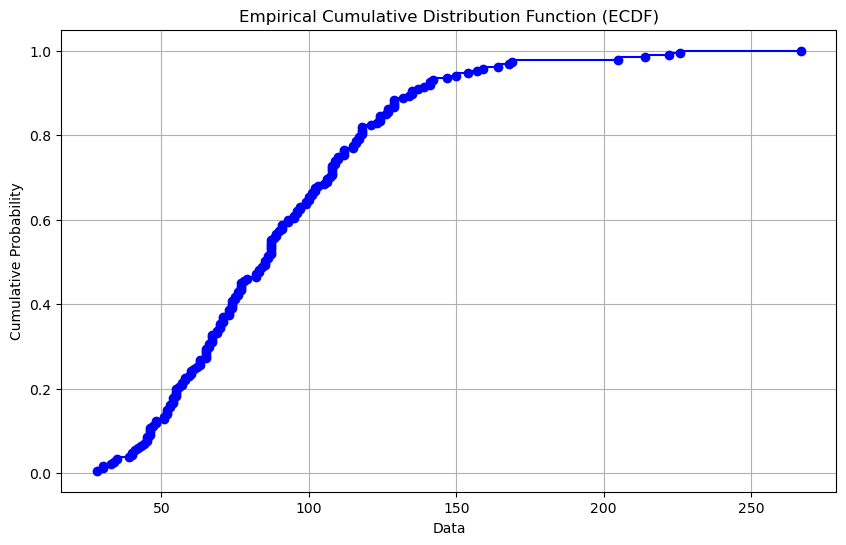

In [30]:
plt.figure(figsize = (10,6))
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['Sales'])

# Plot ECDF
plt.step(ecdf.x, ecdf.y, marker='o', linestyle='-', color='b')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

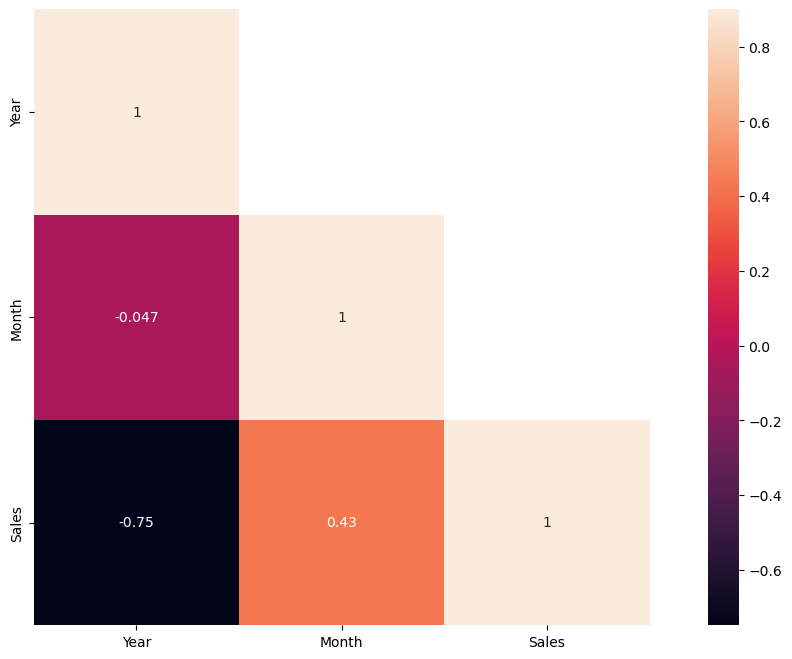

In [31]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

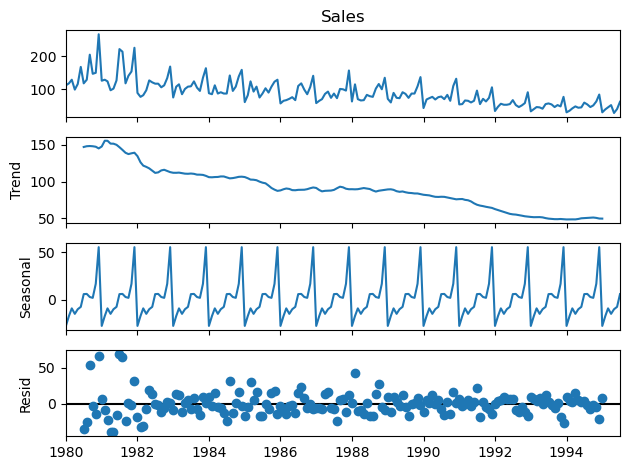

In [32]:
decomposition = seasonal_decompose(df['Sales'],model='additive')
decomposition.plot();

In [33]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -28.031994
1980-02-01   -17.543105
1980-03-01    -9.418105
1980-04-01   -15.230605
1980-05-01   -10.328819
1980-06-01    -7.810962
1980-07-01     5.718006
1980-08-01     5.931895
1980-09-01     2.651339
1980-10-01     1.748562
1980-11-01    16.723562
1980-12-01    55.590228
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -34.801339
1980-08-01   -25.056895
1980-09-01    53.973661
1980-10-01    -2.831895
1980-11-01   -14.140228
1980-12-01    66.28477

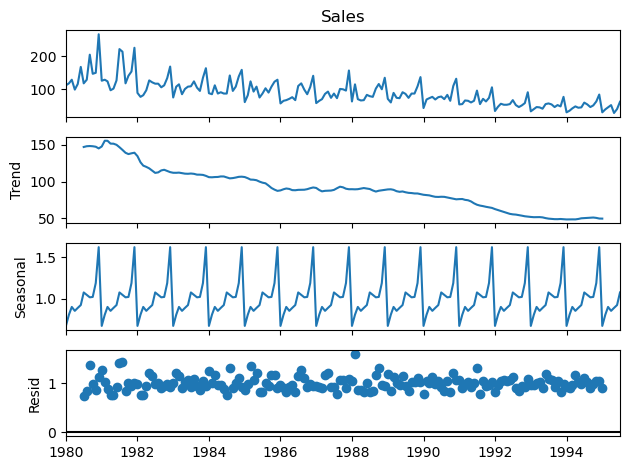

In [34]:
decomposition = seasonal_decompose(df['Sales'],model='multiplicative')
decomposition.plot();

In [35]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.668577
1980-02-01    0.804550
1980-03-01    0.898744
1980-04-01    0.851237
1980-05-01    0.886934
1980-06-01    0.921546
1980-07-01    1.074644
1980-08-01    1.044683
1980-09-01    1.015406
1980-10-01    1.020108
1980-11-01    1.189232
1980-12-01    1.624338
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.746542
1980-08-01    0.833636
1980-09-01    1.360672
1980-10-01    0.973117
1980-11-01    0.855614
1980-12-01    1.132642
Name: resid, dtype: fl

In [36]:
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [37]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1980-01-01  1980      1  112.0
1980-02-01  1980      2  118.0
1980-03-01  1980      3  129.0
1980-04-01  1980      4   99.0
1980-05-01  1980      5  116.0 

Last few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1990-08-01  1990      8   70.0
1990-09-01  1990      9   83.0
1990-10-01  1990     10   65.0
1990-11-01  1990     11  110.0
1990-12-01  1990     12  132.0 

First few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1991-01-01  1991      1   54.0
1991-02-01  1991      2   55.0
1991-03-01  1991      3   66.0
1991-04-01  1991      4   65.0
1991-05-01  1991      5   60.0 

Last few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1995-03-01  1995      3   45.0
1995-04-01  1995      4   52.0
1995-0

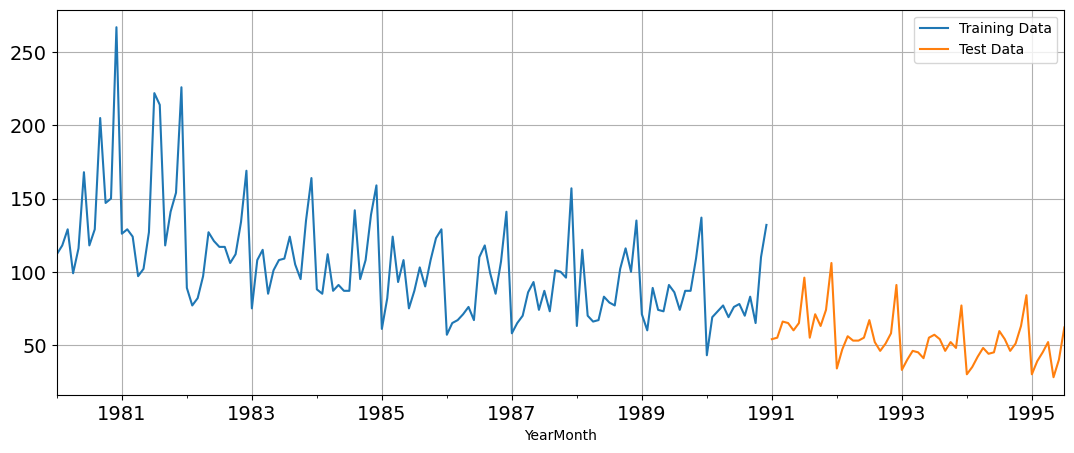

In [38]:
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Model 1: Linear Regression

In [39]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [40]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [41]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

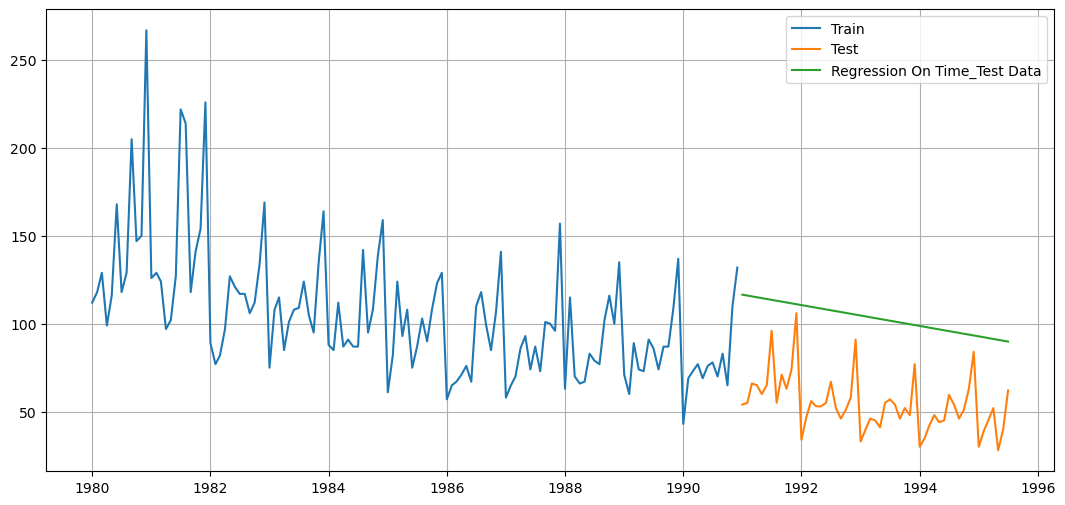

In [42]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [43]:
rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

,Test RMSE
Linear Regression,51.080941


 Model 2: Naive Approach: 

In [44]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [45]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

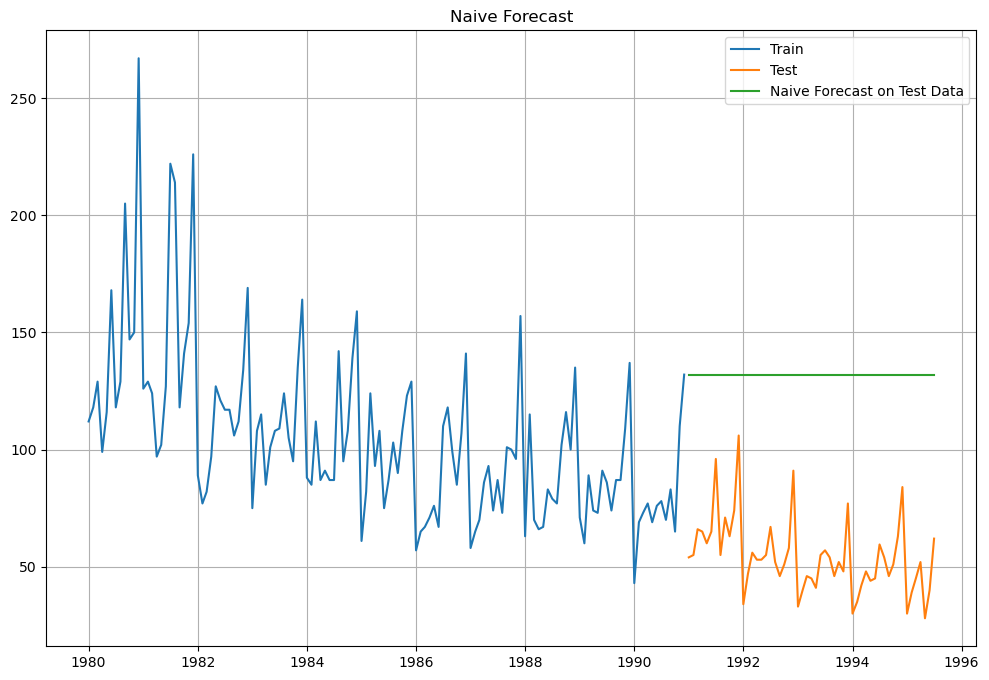

In [46]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [47]:
rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391


Method 3: Simple Average

In [48]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [49]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

,Year,Month,Sales,mean_forecast
YearMonth,,,,
1991-01-01,1991,1,54.0,104.939394
1991-02-01,1991,2,55.0,104.939394
1991-03-01,1991,3,66.0,104.939394
1991-04-01,1991,4,65.0,104.939394
1991-05-01,1991,5,60.0,104.939394


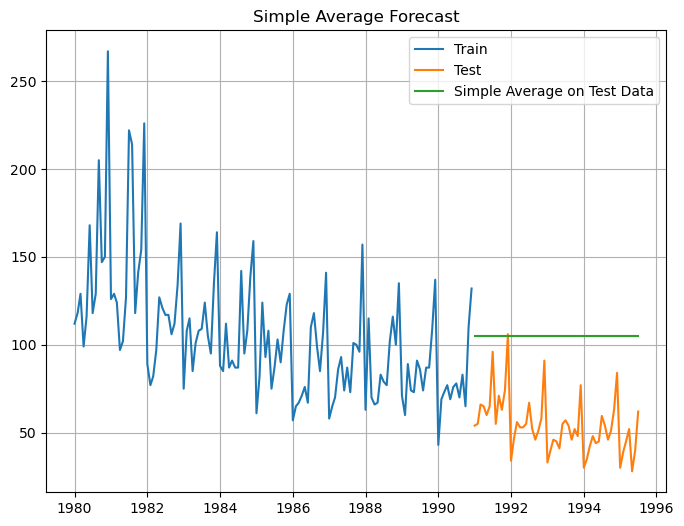

In [50]:
plt.figure(figsize=(8,6))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [51]:
rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755


 Moving Average(MA)

In [52]:
MovingAverage = df.copy()
MovingAverage.head()

,Year,Month,Sales
YearMonth,,,
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0


In [53]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

,Year,Month,Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1980-01-01,1980,1,112.0,NaN,NaN,NaN,NaN
1980-02-01,1980,2,118.0,115.0,NaN,NaN,NaN
1980-03-01,1980,3,129.0,123.5,NaN,NaN,NaN
1980-04-01,1980,4,99.0,114.0,114.5,NaN,NaN
1980-05-01,1980,5,116.0,107.5,115.5,NaN,NaN


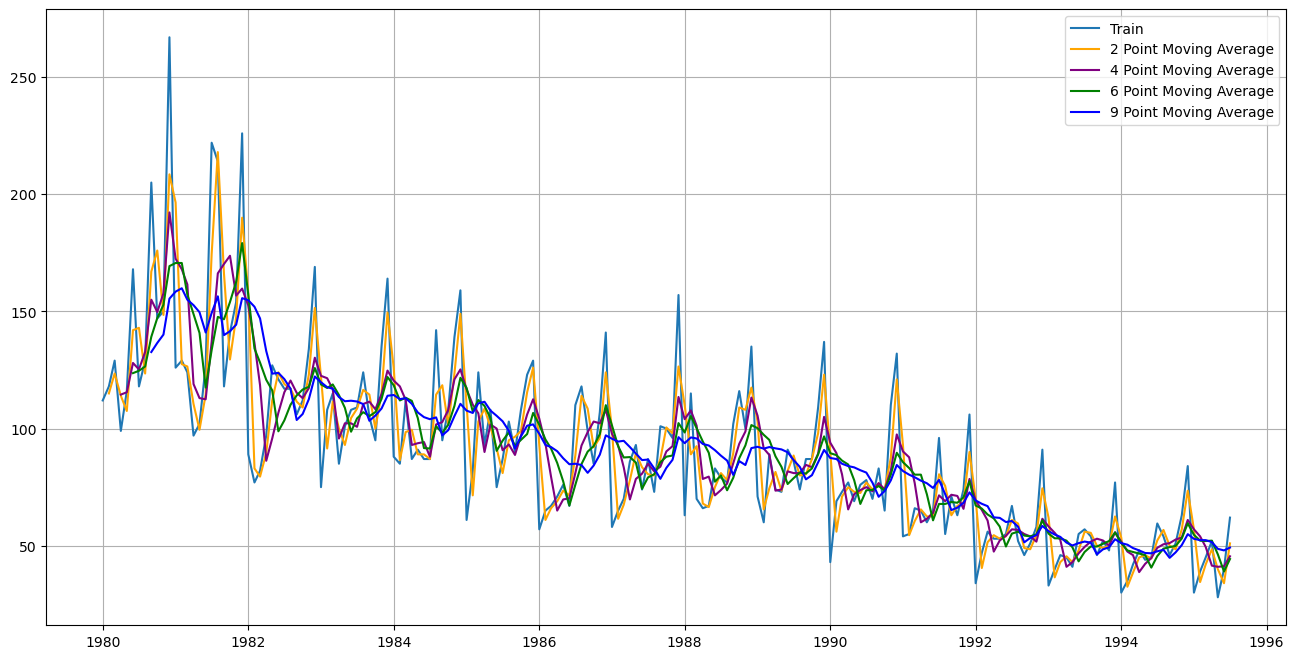

In [54]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average',color='orange')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average',color='purple')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average',color='green')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average',color='blue')

plt.legend(loc = 'best')
plt.grid();

In [55]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


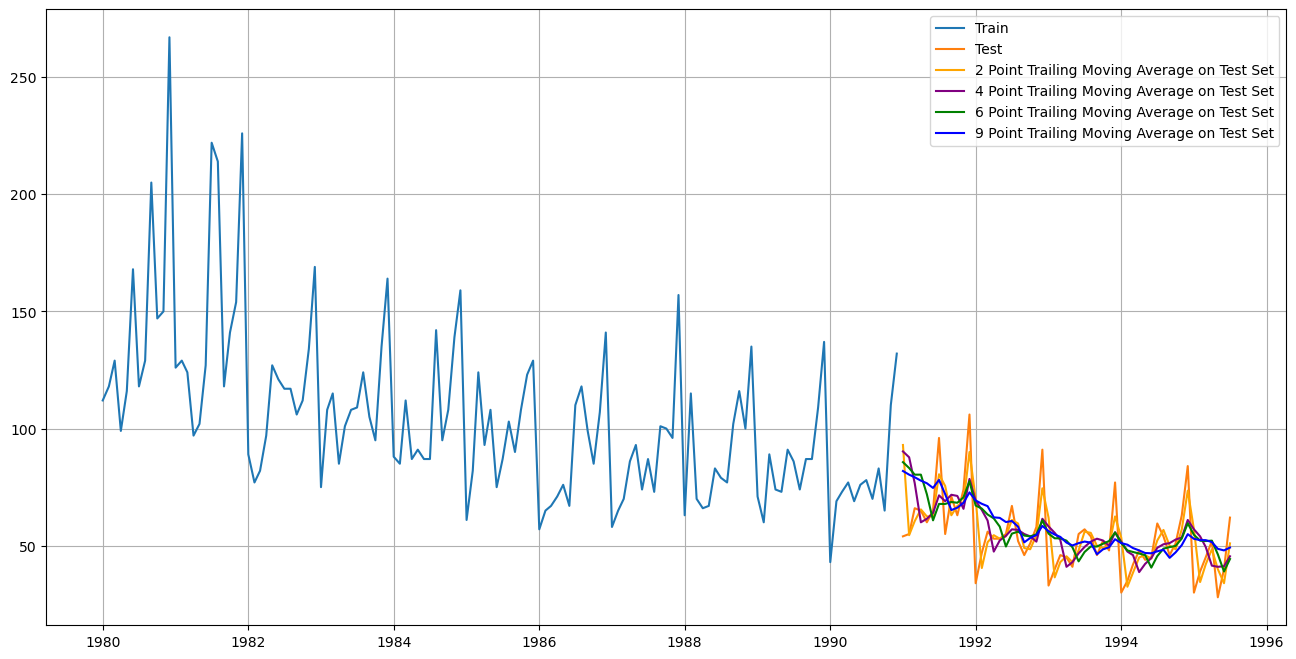

In [56]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set',color='orange')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set',color='purple')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set',color='green')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set',color='blue')
plt.legend(loc = 'best')
plt.grid();

In [57]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)

rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)

rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)

rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [58]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139


 Simple Exponential Smoothing

In [59]:
SES_train = train.copy()
SES_test = test.copy()

In [60]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [61]:
model_SES_autofit = model_SES.fit(optimized=True)

In [62]:
model_SES_autofit.params

{'smoothing_level': 0.12362013466760018,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [63]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [64]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Year,Month,Sales,predict
YearMonth,,,,
1991-01-01,1991,1,54.0,87.983765
1991-02-01,1991,2,55.0,87.983765
1991-03-01,1991,3,66.0,87.983765
1991-04-01,1991,4,65.0,87.983765
1991-05-01,1991,5,60.0,87.983765


In [65]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_temp = resultsDf_temp._append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

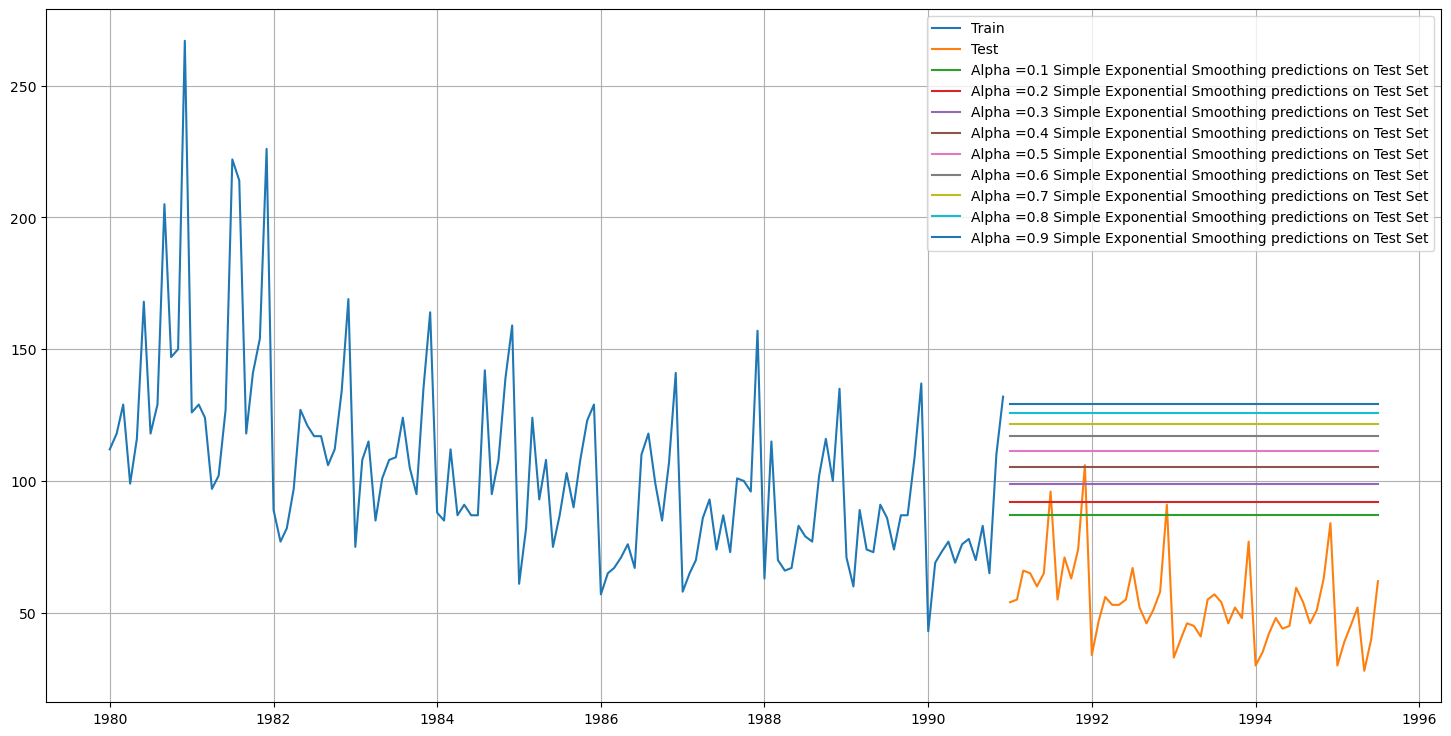

In [66]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [67]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,31.815610,36.429535
1,0.2,31.979391,40.957988
2,0.3,32.470164,47.096522
3,0.4,33.035130,53.356493
4,0.5,33.682839,59.229384
5,0.6,34.441171,64.558022
6,0.7,35.323261,69.284383
7,0.8,36.334596,73.359904
8,0.9,37.482782,76.725002


In [68]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535


Double Exponential Smoothing (Holt's Model)

In [69]:
DES_train = train.copy()
DES_test = test.copy()

In [70]:
model_DES = Holt(DES_train['Sales'])

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [71]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': 0.16213321015010723,
 'smoothing_trend': 0.13152155372234675,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Year,Month,Sales,predict
YearMonth,,,,
1991-01-01,1991,1,54.0,87.249993
1991-02-01,1991,2,55.0,88.152722
1991-03-01,1991,3,66.0,89.055451
1991-04-01,1991,4,65.0,89.958180
1991-05-01,1991,5,60.0,90.860910


In [73]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [74]:
# Assuming DES_test['predict'] is the column containing DES predictions
rmse_model_temp = metrics.mean_squared_error(DES_test['Sales'], DES_test['predict'], squared=False)
print("For Alpha = 0.6477, Beta = 0.0, Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" % (rmse_model_temp))


For Alpha = 0.6477, Beta = 0.0, Double Exponential Smoothing Model forecast on the Test Data, RMSE is 62.561


In [75]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = resultsDf_6._append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)
resultsDf_6

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.510010
1,0.1,0.2,33.450729,48.221436
2,0.1,0.3,33.145789,77.649847
3,0.1,0.4,33.262191,99.064536
4,0.1,0.5,33.688415,123.742433
...,...,...,...,...
95,1.0,0.6,51.831610,801.137173
96,1.0,0.7,54.497039,841.349112
97,1.0,0.8,57.365879,853.421959
98,1.0,0.9,60.474309,834.167545


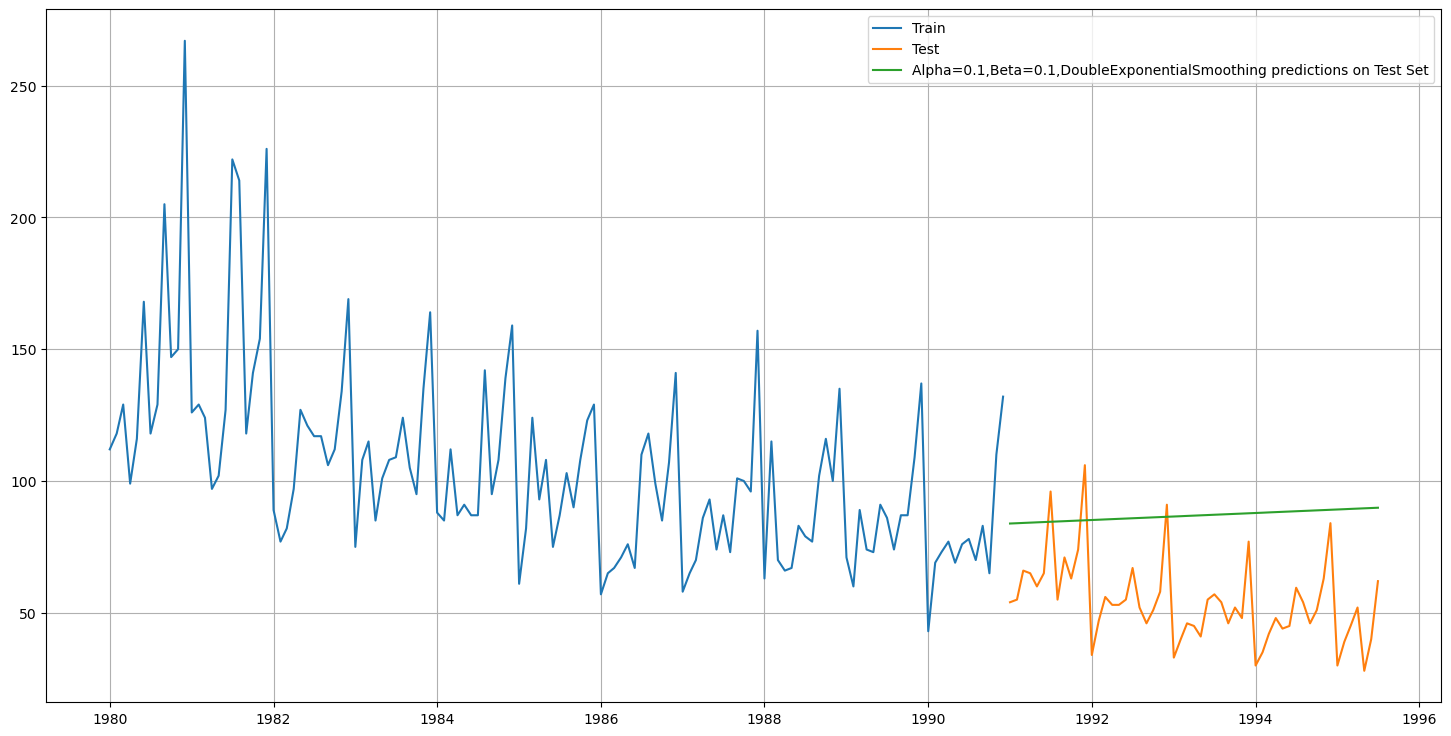

In [76]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [77]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.510010
1,0.1,0.2,33.450729,48.221436
10,0.2,0.1,33.097427,65.251675
2,0.1,0.3,33.145789,77.649847
20,0.3,0.1,33.611269,98.152852


In [78]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010


Triple Exponential Smoothing (Holt - Winter's Model)

In [79]:
TES_train = train.copy()
TES_test = test.copy()

In [80]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [81]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [82]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [83]:
resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [84]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.08491574907842013,
 'smoothing_trend': 5.5205494088745035e-06,
 'smoothing_seasonal': 0.0005477182208247348,
 'damping_trend': nan,
 'initial_level': 147.05898703809248,
 'initial_trend': -0.5496981430927392,
 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
        -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
          4.83969803,   2.95125217,  21.07934859,  63.31472515]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [86]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.053527754869099636,
 'smoothing_trend': 0.03326784064001227,
 'smoothing_seasonal': 1.1369165069859105e-05,
 'damping_trend': nan,
 'initial_level': 114.21180446123547,
 'initial_trend': 0.9923631726352484,
 'initial_seasons': array([0.99382377, 1.12786066, 1.23494689, 1.07812886, 1.21324338,
        1.31945262, 1.44982009, 1.54564845, 1.4653871 , 1.43209206,
        1.67215844, 2.30190104]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.14642857142857144,
 'smoothing_trend': 0.05324675324675325,
 'smoothing_seasonal': 0.13131868131868132,
 'damping_trend': nan,
 'initial_level': 145.27499999999992,
 'initial_trend': 1.0052617032482805,
 'initial_seasons': array([-30.484375  , -25.046875  , -15.53645833, -30.734375  ,
        -16.46354167,  -9.72395833,  12.44270833,  17.53645833,
          5.55729167,  -3.890625  ,  15.99479167,  80.34895833]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa
YearMonth,,,,
1991-01-01,1991,1,54.0,42.574560
1991-02-01,1991,2,55.0,54.372099
1991-03-01,1991,3,66.0,61.821511
1991-04-01,1991,4,65.0,50.671639
1991-05-01,1991,5,60.0,58.932400


In [89]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm
YearMonth,,,,,
1991-01-01,1991,1,54.0,42.574560,55.942246
1991-02-01,1991,2,55.0,54.372099,63.240624
1991-03-01,1991,3,66.0,61.821511,68.899674
1991-04-01,1991,4,65.0,50.671639,60.007486
1991-05-01,1991,5,60.0,58.932400,67.257150


In [90]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm,predict_tm_sm
YearMonth,,,,,,
1991-01-01,1991,1,54.0,42.574560,55.942246,55.753580
1991-02-01,1991,2,55.0,54.372099,63.240624,63.084055
1991-03-01,1991,3,66.0,61.821511,68.899674,68.866825
1991-04-01,1991,4,65.0,50.671639,60.007486,59.942156
1991-05-01,1991,5,60.0,58.932400,67.257150,67.252072


In [91]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm,predict_tm_sm,predict_tm_sa
YearMonth,,,,,,,
1991-01-01,1991,1,54.0,42.574560,55.942246,55.753580,46.284930
1991-02-01,1991,2,55.0,54.372099,63.240624,63.084055,58.354810
1991-03-01,1991,3,66.0,61.821511,68.899674,68.866825,64.361205
1991-04-01,1991,4,65.0,50.671639,60.007486,59.942156,54.433907
1991-05-01,1991,5,60.0,58.932400,67.257150,67.252072,60.002489


In [92]:
rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 14.128
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 18.683
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 19.880
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 16.254


In [93]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",62.560681


In [94]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method


In [95]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)


In [96]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)

In [97]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)

In [98]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

In [99]:
TES_test.head()

,Year,Month,Sales,"(predict_ta_sa, 0.1, 0.1, 0.1)","(predict_ta_sa, 0.1, 0.1, 0.2)","(predict_ta_sa, 0.1, 0.1, 0.30000000000000004)","(predict_ta_sa, 0.1, 0.1, 0.4)","(predict_ta_sa, 0.1, 0.1, 0.5)","(predict_ta_sa, 0.1, 0.1, 0.6)","(predict_ta_sa, 0.1, 0.1, 0.7000000000000001)",...,"(predict_tm_sa, 0.9, 0.8, 0.9)","(predict_tm_sa, 0.9, 0.9, 0.1)","(predict_tm_sa, 0.9, 0.9, 0.2)","(predict_tm_sa, 0.9, 0.9, 0.30000000000000004)","(predict_tm_sa, 0.9, 0.9, 0.4)","(predict_tm_sa, 0.9, 0.9, 0.5)","(predict_tm_sa, 0.9, 0.9, 0.6)","(predict_tm_sa, 0.9, 0.9, 0.7000000000000001)","(predict_tm_sa, 0.9, 0.9, 0.8)","(predict_tm_sa, 0.9, 0.9, 0.9)"
YearMonth,,,,,,,,,,,,,,,,,,,,,
1991-01-01,1991,1,54.0,45.711834,46.537302,46.559436,46.071952,45.225493,44.012323,42.371394,...,3.735952e+33,49.121533,76.518424,376.731488,4895.861548,5.809412e+04,1.638740e+05,-5.749099e+08,-1.981676e+12,9.552794e+39
1991-02-01,1991,2,55.0,56.369270,60.659980,62.645947,63.356292,63.447907,63.255359,62.959944,...,7.148786e+32,37.090349,76.114781,509.316662,16304.896188,6.511844e+05,2.092803e+07,-2.812972e+11,-1.592913e+17,7.303099e+38
1991-03-01,1991,3,66.0,63.004762,65.794341,66.979401,67.649481,68.330584,69.025477,69.443834,...,1.357303e+32,15.196663,47.008485,593.068850,47658.505261,5.673444e+06,8.764094e+08,-2.321151e+11,-4.477184e+20,5.583209e+37
1991-04-01,1991,4,65.0,51.663022,58.369250,62.190538,64.397061,65.989684,67.481555,68.978770,...,2.576482e+31,-2.515265,9.602428,669.057836,138695.857310,4.866318e+07,2.483195e+10,1.937298e+15,-8.742387e+22,4.268341e+36
1991-05-01,1991,5,60.0,58.931424,61.246579,62.077338,62.127541,62.025325,62.111373,62.439476,...,-1.230813e+29,-1.476818,-5.631953,759.079023,403820.871296,4.173403e+08,6.957411e+11,4.618220e+17,-2.928919e+24,-3.966771e+36


In [100]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
2136,0.2,0.7,0.2,24.042290,8.992350,tm_sm
1010,0.1,0.2,0.1,19.770392,9.221020,ta_sm
1011,0.1,0.2,0.2,20.253487,9.543696,ta_sm
1151,0.2,0.6,0.2,23.129850,9.922552,ta_sm
1012,0.1,0.2,0.3,20.871304,9.952909,ta_sm


In [101]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf


,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",62.560681


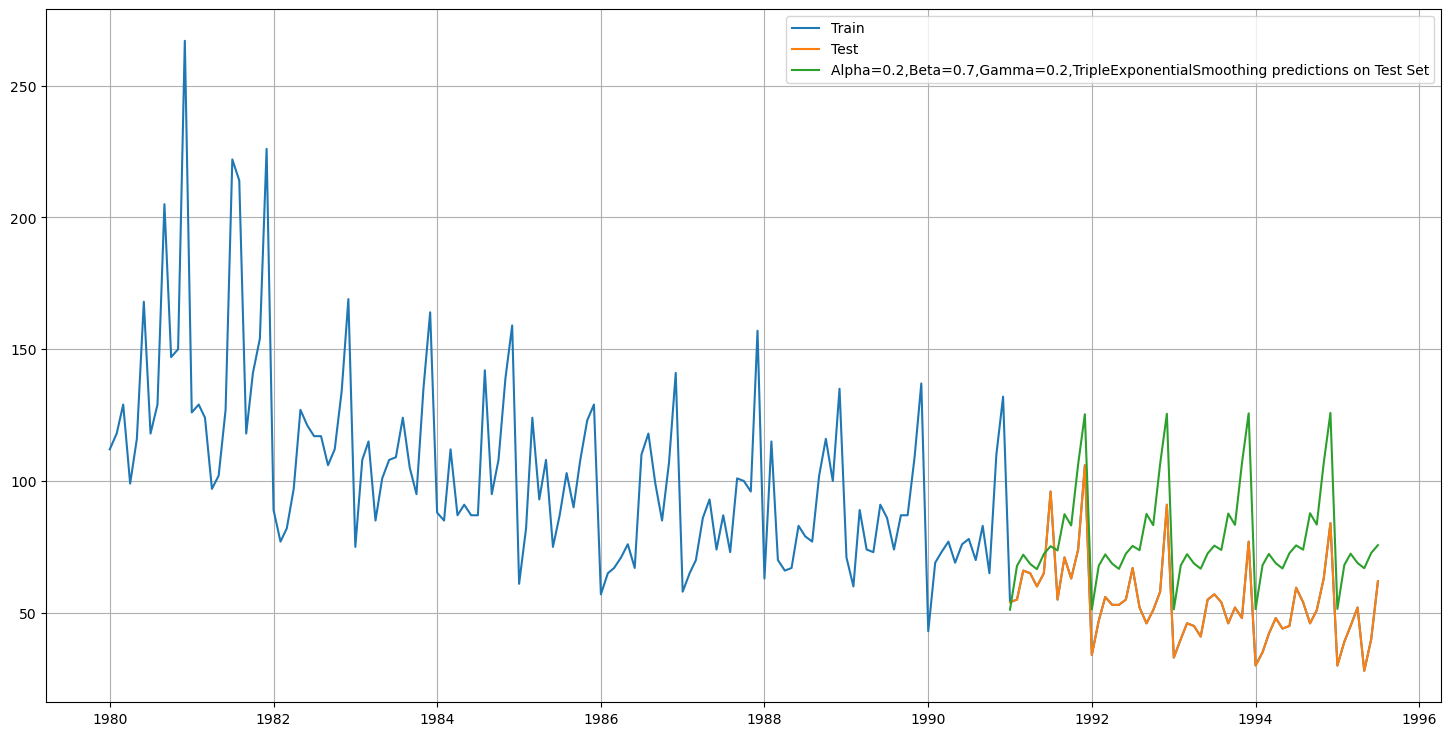

In [154]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004], 
         label='Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

Stationarity

In [103]:
from statsmodels.tsa.stattools import adfuller

In [104]:
dftest = adfuller(df['Sales'])#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.892
DF test p-value is 0.3357


Stationarity should be checked at alpha = 0.05.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*


In [105]:
from statsmodels.tsa.stattools import adfuller

result_adf = adfuller(df['Sales'])

print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:', result_adf[4])

# Check for stationarity at alpha = 0.05
if result_adf[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")


ADF Statistic: -1.8923384008253707
p-value: 0.33567390846708056
Critical Values: {'1%': -3.4687256239864017, '5%': -2.8783961376954363, '10%': -2.57575634100705}
The time series is likely non-stationary.


## How to Make a Time Series Stationary ? - Differencing 'd'

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Differencing **'d'** is done on a non-stationary time series data one or more times to convert it into stationary. 



- **(d=1) 1st order differencing is done where the difference between the current and previous (1 lag before) series is taken and then checked for stationarity using the ADF(Augmented Dicky Fueller) test. If differenced time series is stationary, we proceed with AR modeling. Else we do (d=2) 2nd order differencing, and this process repeats till we get a stationary time series** 

    - <font color='blue'> 1st  order differencing equation is : $𝒚_{𝒕} = 𝒚_{𝒕} − 𝒚_{𝒕-1}$
	- 2nd order differencing equation is : $𝒚_{𝒕} = (𝒚_{𝒕} − 𝒚_{𝒕-1}) − (𝒚_{𝒕-1} -y_{t-2})$		and so on…</font>


- The variance of a time series may also not be the same over time.   To remove this kind of non-stationarity, we can transform     the data. **If the variance is increasing over time, then a log transformation can stabilize the variance.** 


####  Non differenced full data Time series

In [106]:
sales_ts=df['Sales']

Text(0, 0.5, 'Sales')

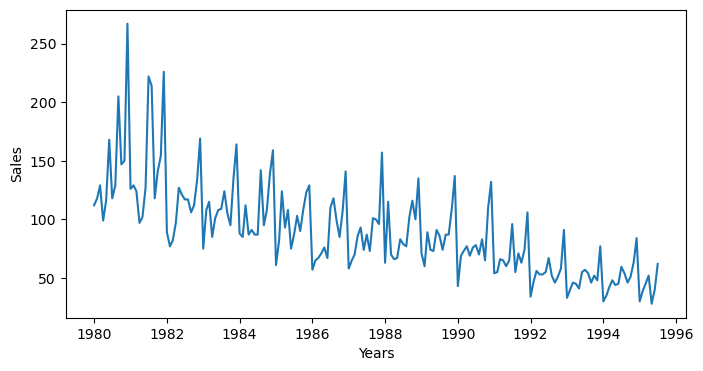

In [107]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Sales')

In [108]:
#### Performing differencing ( d=1 ) as the data is non-stationary

Text(0, 0.5, 'Sales')

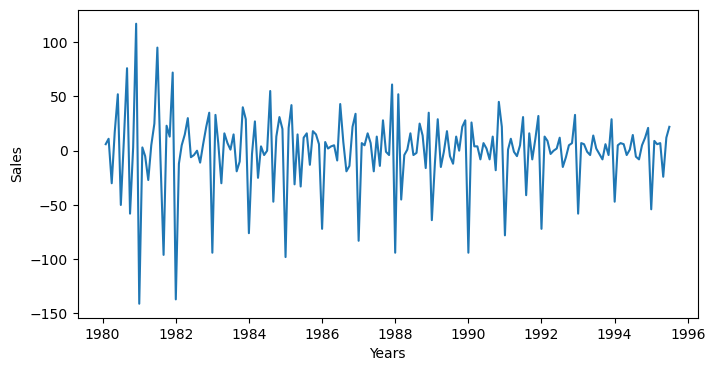

In [109]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Sales')

In [110]:
#This suggests a log transformation of the data

Text(0, 0.5, 'Log (Sales)')

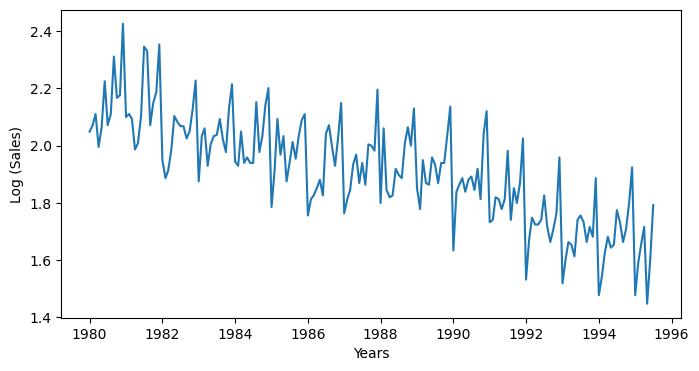

In [111]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Sales)')

In [112]:
#Performing differencing (d=1) on the log transformed time series

Text(0, 0.5, 'Differenced Log (Sales)')

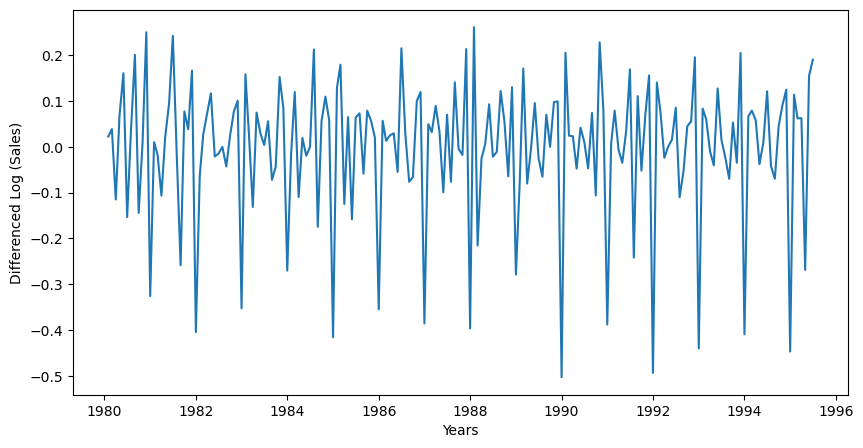

In [113]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Sales)')

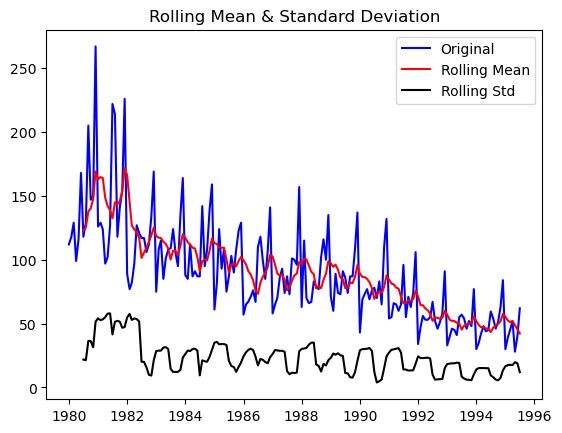

Results of Dickey-Fuller Test:
Test Statistic                  -1.892338
p-value                          0.335674
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [114]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df['Sales'])

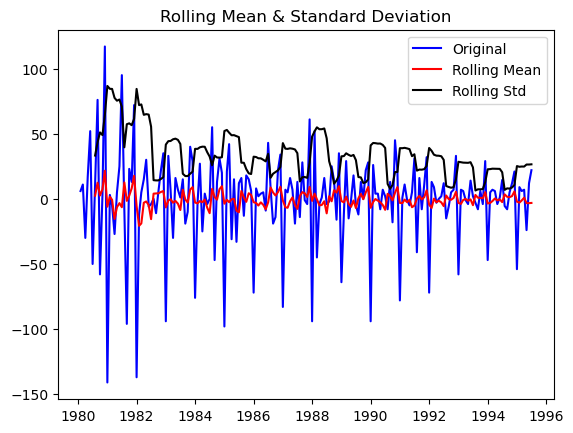

Results of Dickey-Fuller Test:
Test Statistic                -8.032729e+00
p-value                        1.938803e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [115]:
test_stationarity(df['Sales'].diff().dropna())

*Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE*

In [116]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [117]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [118]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC._append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.309831974832
ARIMA(0, 1, 2) - AIC:1279.67152885358
ARIMA(0, 1, 3) - AIC:1280.5453761734657
ARIMA(1, 1, 0) - AIC:1317.350310538146
ARIMA(1, 1, 1) - AIC:1280.5742295380046
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(1, 1, 3) - AIC:1281.870722330996
ARIMA(2, 1, 0) - AIC:1298.6110341604945
ARIMA(2, 1, 1) - AIC:1281.5078621868622
ARIMA(2, 1, 2) - AIC:1281.8707222264493


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6951156334449
ARIMA(3, 1, 0) - AIC:1297.481091727168
ARIMA(3, 1, 1) - AIC:1282.4192776271984
ARIMA(3, 1, 2) - AIC:1283.7207405977126
ARIMA(3, 1, 3) - AIC:1278.6638112715361


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [119]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
11,"(2, 1, 3)",1274.695116
15,"(3, 1, 3)",1278.663811
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376
5,"(1, 1, 1)",1280.574230
9,"(2, 1, 1)",1281.507862
10,"(2, 1, 2)",1281.870722
7,"(1, 1, 3)",1281.870722
1,"(0, 1, 1)",1282.309832


In [120]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Wed, 17 Jan 2024   AIC                           1274.695
Time:                        12:22:30   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.050      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.710      0.000      -0.893      -0.565
ma.L1          1.0448      0.664      1.573      0.1

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [121]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

36.41892693022359


In [122]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",62.560681


SARIMAX

In [123]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [124]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [125]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00750D+00    |proj g|=  3.85985D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.652D-07   5.007D+00
  F =   5.0074461648784689     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.



At iterate   10    f=  3.67618D+00    |proj g|=  1.48313D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     21      1     0     0   6.291D-06   3.676D+00
  F =   3.6758997334776109     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380892
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57968D+01    |proj g|=  3.08870D-02


 This problem is unconstrained.


  ys=-2.609E+02  -gs= 7.102E-01 BFGS update SKIPPED
  ys=-4.986E+01  -gs= 7.022E-01 BFGS update SKIPPED
  ys=-3.187E+01  -gs= 6.965E-01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     55      4     3     0   3.831D+04   1.561D+01
  F =   15.605104533729310     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4127.747596904538
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30273D+00    |proj g|=  8.59774D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   6.232D-05   3.643D+00
  F =   3.6427703165734169     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753821
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50158D+01    |proj g|=  4.30608D-02


 This problem is unconstrained.


  ys=-3.924E+01  -gs= 6.989E-01 BFGS update SKIPPED

At iterate    5    f=  1.43209D+01    |proj g|=  2.26052D+03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     74      2     1     0   2.636D-04   1.431D+01
  F =   14.309724958380791     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3787.767389012529
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61697D+00    |proj g|=  1.53844D-05


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     14      1     0     0   1.538D-05   3.617D+00
  F =   3.6169743258913032     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63243D+00    |proj g|=  1.97743D-01

At iterate    5    f=  3.61727D+00    |proj g|=  2.52418D-03

At iterate   10    f=  3.61708D+00    |proj g|=  1.49043D-02

At iterate   15

 This problem is unconstrained.



At iterate   10    f=  3.58182D+00    |proj g|=  3.70025D-03

At iterate   15    f=  3.58172D+00    |proj g|=  4.53055D-03

At iterate   20    f=  3.58172D+00    |proj g|=  1.21848D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.218D-05   3.582D+00
  F =   3.5817179579341367     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894612
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.


  ys=-2.468E+01  -gs= 6.927E-01 BFGS update SKIPPED
  ys=-5.946E+00  -gs= 6.274E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     85      2     2     0   2.085D+05   1.290D+01
  F =   12.898161982946029     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3417.1147634977515
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19225D+00    |proj g|=  1.47546D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

 This problem is unconstrained.



At iterate    5    f=  3.19189D+00    |proj g|=  1.09865D-02

At iterate   10    f=  3.18929D+00    |proj g|=  2.04893D-02

At iterate   15    f=  3.18899D+00    |proj g|=  1.80898D-03

At iterate   20    f=  3.18867D+00    |proj g|=  3.54410D-02

At iterate   25    f=  3.18844D+00    |proj g|=  1.02233D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     38      1     0     0   1.284D-05   3.188D+00
  F =   3.1884404176726786     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702655872
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.18716D+00    |proj g|=  3.82967D-02

At iterate   10    f=  3.18050D+00    |proj g|=  2.35084D-02

At iterate   15    f=  3.18016D+00    |proj g|=  2.45300D-02

At iterate   20    f=  3.17646D+00    |proj g|=  2.37516D-02

At iterate   25    f=  3.17625D+00    |proj g|=  1.15387D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   1.920D-05   3.176D+00
  F =   3.1762515667153357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136128486
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.


  ys=-8.192E+01  -gs= 7.060E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     82      2     1     0   8.113D+04   1.406D+01
  F =   14.063669654696232     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3726.8087888398054
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82449D+00    |proj g|=  1.76895D-01

At iterate    5    f=  4.77773D+00    |proj g|=  7.90029D-03

At iterate   10    f=  4.77354D+00    |proj g|=  1.64496D-01

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  3.68220D+00    |proj g|=  1.65259D-02

At iterate   10    f=  3.52809D+00    |proj g|=  8.13746D-01

At iterate   15    f=  3.46833D+00    |proj g|=  2.15978D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     28      1     0     0   1.159D-05   3.468D+00
  F =   3.4683007762817670     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383865
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.


  ys=-4.644E+01  -gs= 6.942E-01 BFGS update SKIPPED
  ys=-8.542E+00  -gs= 7.007E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     85      2     2     0   3.894D+04   1.449D+01
  F =   14.490602348874045     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3835.519020102748
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.26445D+00    |proj g|=  9.77384D-02

At iterate    5    f=  4.23574D+00    |proj g|=  1.41313D-02

At iterate   10    f=  4.19459D+00    |proj g|=  3.51510D-01

At iterate   15

 This problem is unconstrained.



At iterate   20    f=  3.96668D+00    |proj g|=  2.52323D-02

At iterate   25    f=  3.96494D+00    |proj g|=  2.45195D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     67      2     0     0   2.551D-05   3.965D+00
  F =   3.9649372465710404     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947547
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70606D+00    |proj g|=  1.16728D-01

At iterate    5    f=  3.66794D+00    |proj g|=  1.64727D-02

At iterate   10    f=  3.64073D+00    |proj g|=  5.56530D-02

At iterate   1

 This problem is unconstrained.


  ys=-5.817E+01  -gs= 4.870E-01 BFGS update SKIPPED

At iterate    5    f=  1.33357D+01    |proj g|=  1.19576D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     50      2     1     0   1.196D+05   1.334D+01
  F =   13.335726370236712     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3532.631761742492
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73052D+00    |proj g|=  4.18707D-02



 This problem is unconstrained.


At iterate    5    f=  3.71329D+00    |proj g|=  3.38643D-02

At iterate   10    f=  3.46626D+00    |proj g|=  3.19801D-01

At iterate   15    f=  3.43448D+00    |proj g|=  5.05338D-02

At iterate   20    f=  3.43408D+00    |proj g|=  7.96598D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     33      1     0     0   7.966D-06   3.434D+00
  F =   3.4340844191423607     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535833
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0  

 This problem is unconstrained.



At iterate   15    f=  3.43852D+00    |proj g|=  1.26595D-01

At iterate   20    f=  3.42934D+00    |proj g|=  1.91667D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     34      1     0     0   5.392D-06   3.429D+00
  F =   3.4292925872960822     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461656
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68289D+00    |proj g|=  9.85056D-02


 This problem is unconstrained.



At iterate    5    f=  3.64510D+00    |proj g|=  1.76691D-02

At iterate   10    f=  3.57795D+00    |proj g|=  1.71271D-01

At iterate   15    f=  3.52131D+00    |proj g|=  7.58246D-02

At iterate   20    f=  3.43576D+00    |proj g|=  4.94194D-01

At iterate   25    f=  3.37650D+00    |proj g|=  6.08421D-02

At iterate   30    f=  3.37301D+00    |proj g|=  9.06121D-03

At iterate   35    f=  3.36953D+00    |proj g|=  3.80421D-02

At iterate   40    f=  3.36866D+00    |proj g|=  1.17934D-02

At iterate   45    f=  3.36824D+00    |proj g|=  1.60961D-03

At iterate   50    f=  3.36819D+00    |proj g|=  2.57634D-03

At iterate   55    f=  3.36818D+00    |proj g|=  5.34236D-03

At iterate   60    f=  3.36818D+00    |proj g|=  6.69766D-05

At iterate   65    f=  3.36818D+00    |proj g|=  5.55840D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54693D+01    |proj g|=  2.03389D-02
  ys=-4.648E+01  -gs= 6.942E-01 BFGS update SKIPPED

At iterate    5    f=  1.43719D+01    |proj g|=  4.09149D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     47      1     1     0   5.813D-06   1.437D+01
  F =   14.371942651470048     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3808.1928599880926
RUNNING THE L-BFGS-B CODE

 This problem is unconstrained.



At iterate    5    f=  3.28521D+00    |proj g|=  1.66990D-02

At iterate   10    f=  3.06828D+00    |proj g|=  3.63044D-01

At iterate   15    f=  2.98805D+00    |proj g|=  5.34787D-02

At iterate   20    f=  2.98708D+00    |proj g|=  1.17374D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     32      1     0     0   6.603D-05   2.987D+00
  F =   2.9870794563686469     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.5889764813228
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.28539D+00    |proj g|=  1.67135D-02

At iterate   10    f=  3.11491D+00    |proj g|=  1.97913D-01

At iterate   15    f=  2.99934D+00    |proj g|=  1.49731D-01

At iterate   20    f=  2.99028D+00    |proj g|=  5.42970D-03

At iterate   25    f=  2.98742D+00    |proj g|=  7.07113D-02

At iterate   30    f=  2.98668D+00    |proj g|=  1.82011D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     53      1     0     0   7.454D-06   2.987D+00
  F =   2.9866836862501094     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.48449317002

 This problem is unconstrained.



At iterate   10    f=  3.20987D+00    |proj g|=  9.63389D-02

At iterate   15    f=  3.02985D+00    |proj g|=  8.93508D-02

At iterate   20    f=  2.99327D+00    |proj g|=  1.99558D-01

At iterate   25    f=  2.98202D+00    |proj g|=  3.13548D-02

At iterate   30    f=  2.98129D+00    |proj g|=  3.61581D-03

At iterate   35    f=  2.98129D+00    |proj g|=  3.26415D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     42      1     0     0   3.264D-05   2.981D+00
  F =   2.9812860869847642     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.05952696397

 This problem is unconstrained.


  ys=-4.641E+01  -gs= 6.942E-01 BFGS update SKIPPED
  ys=-1.452E+01  -gs= 6.983E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     85      2     2     0   6.430D+04   1.403D+01
  F =   14.031567874723139     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3720.3339189269086
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.73273D+00    |proj g|=  1.97002D-01

At iterate    5    f=  4.72081D+00    |proj g|=  6.00755D-03

At iterate   10    f=  4.72060D+00    |proj g|=  3.46954D-02

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.61768D+00    |proj g|=  6.17181D-02

At iterate   10    f=  3.60247D+00    |proj g|=  9.99630D-02

At iterate   15    f=  3.42440D+00    |proj g|=  5.15436D-02

At iterate   20    f=  3.42233D+00    |proj g|=  3.22710D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   2.091D-06   3.422D+00
  F =   3.4223251843248894     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617708
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.


  ys=-8.691E+01  -gs= 6.915E-01 BFGS update SKIPPED
  ys=-3.183E-01  -gs= 4.693E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     86      2     2     0   1.361D+05   1.358D+01
  F =   13.583714199607664     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:3598.100548696423
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20537D+00    |proj g|=  9.90819D-02

At iterate    5    f=  4.19636D+00    |proj g|=  1.45467D-02

At iterate   10    f=  4.17278D+00    |proj g|=  1.58683D-01

At iterate   15

 This problem is unconstrained.


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933611281
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62467D+00    |proj g|=  1.21016D-01

At iterate    5    f=  3.59567D+00    |proj g|=  1.70714D-02

At iterate   10    f=  3.58784D+00    |proj g|=  1.99114D-02


 This problem is unconstrained.



At iterate   15    f=  3.50486D+00    |proj g|=  2.08492D-01

At iterate   20    f=  3.39380D+00    |proj g|=  1.08431D-01

At iterate   25    f=  3.38194D+00    |proj g|=  5.13802D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   8.066D-05   3.382D+00
  F =   3.3819359520952035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913531337
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.


  ys=-5.447E+07  -gs= 8.465E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     79      2     1     0   1.648D+06   9.932D+00
  F =   9.9316163545996012     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2635.946717614295
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68755D+00    |proj g|=  4.11826D-02

At iterate    5    f=  3.67737D+00    |proj g|=  2.58995D-02

At iterate   10    f=  3.47907D+00    |proj g|=  2.92573D-01

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  3.67886D+00    |proj g|=  1.95074D-02

At iterate   10    f=  3.62995D+00    |proj g|=  1.99001D-01

At iterate   15    f=  3.48363D+00    |proj g|=  9.32668D-02

At iterate   20    f=  3.42378D+00    |proj g|=  1.52616D-01

At iterate   25    f=  3.41731D+00    |proj g|=  1.35083D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   2.465D-05   3.417D+00
  F =   3.4173134640145135     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707544998316
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  3.55771D+00    |proj g|=  4.60310D-02

At iterate   15    f=  3.38907D+00    |proj g|=  2.56644D-01

At iterate   20    f=  3.31168D+00    |proj g|=  6.30440D-02

At iterate   25    f=  3.31037D+00    |proj g|=  5.69038D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     34      1     0     0   2.346D-05   3.310D+00
  F =   3.3103693506357708     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085678435
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0 

 This problem is unconstrained.


  ys=-9.272E+01  -gs= 6.918E-01 BFGS update SKIPPED
  ys=-1.377E+01  -gs= 6.968E-01 BFGS update SKIPPED

At iterate    5    f=  1.42174D+01    |proj g|=  2.08825D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     58      1     2     0   2.746D-06   1.422D+01
  F =   14.217405796452271     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3769.3951302633996
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26604D+00

 This problem is unconstrained.



At iterate    5    f=  3.25355D+00    |proj g|=  2.79473D-02

At iterate   10    f=  3.15596D+00    |proj g|=  1.81080D-01

At iterate   15    f=  2.98631D+00    |proj g|=  7.68042D-02

At iterate   20    f=  2.98524D+00    |proj g|=  9.59091D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     30      1     0     0   3.192D-06   2.985D+00
  F =   2.9852349202176240     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189374527
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.25360D+00    |proj g|=  3.18886D-02

At iterate   10    f=  3.12395D+00    |proj g|=  4.78007D-01

At iterate   15    f=  2.99123D+00    |proj g|=  6.27188D-02

At iterate   20    f=  2.98588D+00    |proj g|=  3.92670D-02

At iterate   25    f=  2.98483D+00    |proj g|=  5.30170D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     37      1     0     0   1.165D-05   2.985D+00
  F =   2.9848261668687215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080533425
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.25716D+00    |proj g|=  1.70996D-02

At iterate   10    f=  3.23442D+00    |proj g|=  7.61818D-02

At iterate   15    f=  3.03933D+00    |proj g|=  1.13300D-01

At iterate   20    f=  3.00662D+00    |proj g|=  6.17781D-02

At iterate   25    f=  2.98004D+00    |proj g|=  7.81018D-02

At iterate   30    f=  2.97927D+00    |proj g|=  2.89444D-03

At iterate   35    f=  2.97924D+00    |proj g|=  7.06019D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     46      1     0     0   6.117D-05   2.979D+00
  F =   2.9792448970517160     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


  ys=-8.888E+01  -gs= 6.916E-01 BFGS update SKIPPED
  ys=-1.831E+00  -gs= 4.540E-01 BFGS update SKIPPED

At iterate    5    f=  1.04751D+01    |proj g|=  4.27542D+05
  ys=-4.001E-02  -gs= 6.574E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6    104      2     3     0   4.275D+05   1.048D+01
  F =   10.475087963053635     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2783.4232222461596
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.70178D+00    |proj g|=  2.27555D-01

At iterate    5    f=  4.68289D+00    |proj g|=  4.83165D-02

At iterate   10    f=  4.68272D+00    |proj g|=  8.30165D-03

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  3.53851D+00    |proj g|=  2.28855D-02

At iterate   10    f=  3.53282D+00    |proj g|=  5.25790D-02

At iterate   15    f=  3.46522D+00    |proj g|=  2.44370D-01

At iterate   20    f=  3.38528D+00    |proj g|=  1.12960D-02

At iterate   25    f=  3.38520D+00    |proj g|=  7.26324D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   4.413D-06   3.385D+00
  F =   3.3851994444623172     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380517


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51603D+01    |proj g|=  2.28034D-02
  ys=-1.869E+01  -gs= 6.657E-01 BFGS update SKIPPED
  ys=-2.244E+01  -gs= 6.750E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     78      3     2     0   1.334D+05   1.345D+01
  F =   13.446017997079956     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3563.748751229108
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16948D+00    |proj g|=  1.21944D-01

At iterate    5    f=  4.15585D+00    |proj g|=  1.54124D-02

At iterate   10    f=  4.13731D+00    |proj g|=  7.38791D-02

At iterate   15

 This problem is unconstrained.



At iterate   25    f=  3.87440D+00    |proj g|=  1.46651D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     35      1     0     0   3.022D-05   3.874D+00
  F =   3.8743981867186226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212937162
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55088D+00    |proj g|=  1.36271D-01

At iterate    5    f=  3.51344D+00    |proj g|=  6.67593D-02


 This problem is unconstrained.



At iterate   10    f=  3.50738D+00    |proj g|=  2.43777D-02

At iterate   15    f=  3.41264D+00    |proj g|=  2.77522D-01

At iterate   20    f=  3.34476D+00    |proj g|=  4.27209D-02

At iterate   25    f=  3.34408D+00    |proj g|=  8.96436D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     36      1     0     0   4.932D-06   3.344D+00
  F =   3.3440767133864719     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523340286
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0 

 This problem is unconstrained.


  ys=-3.644E-02  -gs= 7.789E-03 BFGS update SKIPPED

At iterate    5    f=  6.49772D+00    |proj g|=  1.82499D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     51      1     1     0   1.825D+06   6.498D+00
  F =   6.4977187657992239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:1731.397754170995
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64006D+00    |proj g|=  5.53423D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.63135D+00    |proj g|=  2.95062D-02

At iterate   10    f=  3.57638D+00    |proj g|=  2.24704D-01

At iterate   15    f=  3.42502D+00    |proj g|=  1.40337D-01

At iterate   20    f=  3.42026D+00    |proj g|=  1.14202D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     32      1     0     0   5.710D-05   3.420D+00
  F =   3.4202564806769145     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987054
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  3.52904D+00    |proj g|=  3.00947D-01

At iterate   15    f=  3.43397D+00    |proj g|=  2.09387D-01

At iterate   20    f=  3.41769D+00    |proj g|=  7.33494D-02

At iterate   25    f=  3.41691D+00    |proj g|=  1.69751D-03

At iterate   30    f=  3.41691D+00    |proj g|=  5.68710D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     36      1     0     0   5.687D-06   3.417D+00
  F =   3.4169056806366509     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996880758
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.49065D+00    |proj g|=  1.85102D-02

At iterate   10    f=  3.41677D+00    |proj g|=  1.83823D-01

At iterate   15    f=  3.32145D+00    |proj g|=  2.04881D-01

At iterate   20    f=  3.27596D+00    |proj g|=  8.30385D-02

At iterate   25    f=  3.27481D+00    |proj g|=  4.83234D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     35      1     0     0   4.351D-05   3.275D+00
  F =   3.2748143137328154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788254633
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.


  ys=-1.871E+01  -gs= 6.657E-01 BFGS update SKIPPED
  ys=-1.986E+03  -gs= 6.892E-01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      3     40      3     2     0   1.913D+03   1.700D+01
  F =   17.002213820365199     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:4506.584448576413
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.22223D+00    |proj g|=  5.46795D-02

At iterate    5    f=  3.21045D+00    |proj g|=  2.88703D-02

At iterate   10    f=  3.19876D+00    |proj g|=  1.27429D-01

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  3.21030D+00    |proj g|=  3.19810D-02

At iterate   10    f=  3.19976D+00    |proj g|=  4.24483D-02

At iterate   15    f=  3.09357D+00    |proj g|=  1.94114D-01

At iterate   20    f=  2.99872D+00    |proj g|=  1.74705D-01

At iterate   25    f=  2.98872D+00    |proj g|=  2.49903D-02

At iterate   30    f=  2.98482D+00    |proj g|=  7.95753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     32     41      1     0     0   3.015D-05   2.985D+00
  F =   2.9848215046492106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.99287722739

 This problem is unconstrained.



At iterate    5    f=  3.21285D+00    |proj g|=  1.75997D-02

At iterate   10    f=  3.19809D+00    |proj g|=  4.78451D-02

At iterate   15    f=  3.09176D+00    |proj g|=  1.80113D-01

At iterate   20    f=  2.99856D+00    |proj g|=  3.05209D-02

At iterate   25    f=  2.98256D+00    |proj g|=  8.01843D-02

At iterate   30    f=  2.97932D+00    |proj g|=  1.95177D-02

At iterate   35    f=  2.97922D+00    |proj g|=  6.71354D-04

At iterate   40    f=  2.97922D+00    |proj g|=  4.50449D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     40     49      1     0     0   4.504D-05   2.979D+00
  F =   2.97922376010

 This problem is unconstrained.


  ys=-1.869E+01  -gs= 6.657E-01 BFGS update SKIPPED
  ys=-5.256E+01  -gs= 6.806E-01 BFGS update SKIPPED
  ys=-5.250E+01  -gs= 6.806E-01 BFGS update SKIPPED
  ys=-1.225E+01  -gs= 6.510E-01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     73      5     4     0   8.029D+04   1.405D+01
  F =   14.046619009789412     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3728.307418584405
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.94001D+00    |proj g|=  5.63416D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.80258D+00    |proj g|=  1.04850D-01

At iterate    5    f=  3.77292D+00    |proj g|=  8.11557D-02

At iterate   10    f=  3.62988D+00    |proj g|=  9.09667D-02

At iterate   15    f=  3.62099D+00    |proj g|=  1.44029D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   1.946D-06   3.621D+00
  F =   3.6209868906279126     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.61238D+01    |proj g|=  1.95151D-02
  ys=-2.121E+01  -gs= 6.895E-01 BFGS update SKIPPED
  ys=-3.486E+00  -gs= 6.306E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     82      2     2     0   1.472D+05   1.381D+01
  F =   13.806483797351710     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3654.9117225008513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.29750D+00    |proj g|=  5.26649D-02

At iterate    5    f=  4.28582D+00    |proj g|=  8.83415D-02

At iterate   10    f=  4.23821D+00    |proj g|=  1.74289D-03

           * *

 This problem is unconstrained.



At iterate   15    f=  3.59281D+00    |proj g|=  4.46719D-03

At iterate   20    f=  3.59280D+00    |proj g|=  1.23830D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.238D-06   3.593D+00
  F =   3.5928037776320343     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.500197294857
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.55611D+01    |proj g|=  1.95412D-02


 This problem is unconstrained.



At iterate    5    f=  1.43100D+01    |proj g|=  5.16451D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     40      1     0     0   7.370D-03   1.431D+01
  F =   14.309734121328782     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3789.7698080307987
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74204D+00    |proj g|=  1.62290D-02

At iterate    5    f=  3.72088D+00    |proj g|=  1.23244D-01

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.52689D+00    |proj g|=  2.56630D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   8.077D-06   3.527D+00
  F =   3.5268881737363582     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778663985
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74998D+00    |proj g|=  7.71543D-02

At iterate    5    f=  3.73507D+00    |proj g|=  2.17917D-02

At iterate   10

 This problem is unconstrained.



At iterate   15    f=  3.52599D+00    |proj g|=  2.64538D-02

At iterate   20    f=  3.52385D+00    |proj g|=  1.99483D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     23      1     0     0   2.988D-05   3.524D+00
  F =   3.5238534481329911     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071097
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57802D+01    |proj g|=  1.95143D-02


 This problem is unconstrained.


  ys=-2.632E+01  -gs= 6.937E-01 BFGS update SKIPPED

At iterate    5    f=  1.45350D+01    |proj g|=  1.71614D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8     46      1     1     0   5.400D-08   1.453D+01
  F =   14.526479544175492     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3848.99059966233
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30295D+00    |proj g|=  2.07622D-02


 This problem is unconstrained.



At iterate    5    f=  3.29473D+00    |proj g|=  3.76046D-02

At iterate   10    f=  3.10485D+00    |proj g|=  3.00676D-01

At iterate   15    f=  3.06590D+00    |proj g|=  6.68412D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     23      1     0     0   6.128D-06   3.066D+00
  F =   3.0658829667698599     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.393103227243
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.



At iterate   10    f=  3.11359D+00    |proj g|=  1.88908D-01

At iterate   15    f=  3.06497D+00    |proj g|=  2.81224D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   1.103D-05   3.065D+00
  F =   3.0649626407475639     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573569
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33407D+00    |proj g|=  1.24587D-01


 This problem is unconstrained.



At iterate    5    f=  3.29952D+00    |proj g|=  1.48717D-02

At iterate   10    f=  3.24946D+00    |proj g|=  7.24596D-02

At iterate   15    f=  3.10891D+00    |proj g|=  1.37888D-01

At iterate   20    f=  3.05780D+00    |proj g|=  4.63475D-02

At iterate   25    f=  3.04976D+00    |proj g|=  5.00030D-03

At iterate   30    f=  3.04974D+00    |proj g|=  2.66083D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     44      1     0     0   6.441D-06   3.050D+00
  F =   3.0497367753158691     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.13050868338

 This problem is unconstrained.


  ys=-2.108E+01  -gs= 6.894E-01 BFGS update SKIPPED
  ys=-3.924E+00  -gs= 6.262E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     82      2     2     0   1.633D+05   1.337D+01
  F =   13.370846444296008     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3545.9034612941464
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79601D+00    |proj g|=  2.46551D-01

At iterate    5    f=  4.76606D+00    |proj g|=  8.28630D-03

At iterate   10    f=  4.76563D+00    |proj g|=  5.22838D-02

At iterate   1

 This problem is unconstrained.



At iterate   10    f=  3.64967D+00    |proj g|=  8.48309D-02

At iterate   15    f=  3.46782D+00    |proj g|=  7.54151D-02

At iterate   20    f=  3.45866D+00    |proj g|=  1.20865D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   9.466D-06   3.459D+00
  F =   3.4586599333575263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063869
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.


  ys=-1.614E+01  -gs= 6.762E-01 BFGS update SKIPPED
  ys=-4.789E+01  -gs= 6.945E-01 BFGS update SKIPPED
  ys=-2.037E+02  -gs= 7.021E-01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     49      4     3     0   1.038D+04   1.650D+01
  F =   16.497099879809969     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:4367.234368269832
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20722D+00    |proj g|=  1.20422D-01

At iterate    5    f=  4.18948D+00    |proj g|=  2.64416D-02

At iterate   10    f=  4.18448D+00    |proj g|=  9.13561D-02

At iterate   15

 This problem is unconstrained.


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.718054713421
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69168D+00    |proj g|=  1.16429D-01

At iterate    5    f=  3.65768D+00    |proj g|=  1.92292D-02

At iterate   10    f=  3.58549D+00    |proj g|=  1.36094D-01


 This problem is unconstrained.



At iterate   15    f=  3.42854D+00    |proj g|=  5.35342D-02

At iterate   20    f=  3.42564D+00    |proj g|=  1.30569D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   5.105D-05   3.426D+00
  F =   3.4255869047374476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428506861
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52472D+01    |proj g|=  2.45788D-02


 This problem is unconstrained.


  ys=-1.077E+07  -gs= 1.248E-01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     29      2     1     0   2.163D+06   3.798D+00
  F =   3.7980145505505916     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:1016.6758413453562
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68536D+00    |proj g|=  5.43768D-02

At iterate    5    f=  3.67220D+00    |proj g|=  4.30510D-02

At iterate   10    f=  3.43777D+00    |proj g|=  1.88373D-01

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  3.67133D+00    |proj g|=  1.79669D-02

At iterate   10    f=  3.51896D+00    |proj g|=  4.77566D-01

At iterate   15    f=  3.39174D+00    |proj g|=  3.66167D-02

At iterate   20    f=  3.39128D+00    |proj g|=  3.00113D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     27      1     0     0   2.104D-05   3.391D+00
  F =   3.3912776013146693     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470727
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  3.61820D+00    |proj g|=  5.04973D-02

At iterate   15    f=  3.42463D+00    |proj g|=  8.01992D-02

At iterate   20    f=  3.35867D+00    |proj g|=  7.79004D-03

At iterate   25    f=  3.35861D+00    |proj g|=  7.83315D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     35      1     0     0   1.355D-06   3.359D+00
  F =   3.3586082560366783     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.672579593683
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0  

 This problem is unconstrained.


  ys=-1.614E+01  -gs= 6.762E-01 BFGS update SKIPPED
  ys=-4.790E+01  -gs= 6.945E-01 BFGS update SKIPPED
  ys=-2.653E+02  -gs= 7.027E-01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     49      4     3     0   1.350D+04   1.596D+01
  F =   15.956051785809429     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:4228.397671453689
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25534D+00    |proj g|=  4.47585D-02

At iterate    5    f=  3.24189D+00    |proj g|=  2.63956D-02

At iterate   10    f=  3.05173D+00    |proj g|=  2.88826D-01

At iterate   15

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25526D+00    |proj g|=  4.47248D-02

At iterate    5    f=  3.24073D+00    |proj g|=  2.78900D-02

At iterate   10    f=  3.02189D+00    |proj g|=  2.96322D-01

At iterate   15    f=  2.94326D+00    |proj g|=  2.04147D-02

At iterate   20    f=  2.94307D+00    |proj g|=  3.88437D-03

At iterate   25    f=  2.94303D+00    |proj g|=  7.06962D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     37      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  3.24546D+00    |proj g|=  1.66357D-02

At iterate   10    f=  3.16776D+00    |proj g|=  1.63580D-01

At iterate   15    f=  2.99226D+00    |proj g|=  1.32956D-01

At iterate   20    f=  2.95600D+00    |proj g|=  2.89870D-02

At iterate   25    f=  2.93841D+00    |proj g|=  9.12743D-02

At iterate   30    f=  2.93489D+00    |proj g|=  1.34606D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34     40      1     0     0   3.638D-05   2.935D+00
  F =   2.9348916099407942     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.81138502436

 This problem is unconstrained.


  ys=-1.614E+01  -gs= 6.762E-01 BFGS update SKIPPED
  ys=-4.792E+01  -gs= 6.945E-01 BFGS update SKIPPED

At iterate    5    f=  1.44248D+01    |proj g|=  1.49767D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7     40      3     2     0   1.350D-08   1.442D+01
  F =   14.424009665763146     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3825.9385517614705
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74701D+00

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.71664D+00    |proj g|=  3.67193D-02

At iterate   10    f=  4.71351D+00    |proj g|=  2.34626D-03

At iterate   15    f=  4.71275D+00    |proj g|=  2.29530D-02

At iterate   20    f=  4.71193D+00    |proj g|=  1.13388D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   1.557D-05   4.712D+00
  F =   4.7119299396614096     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706122
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  3.52058D+00    |proj g|=  2.77621D-01

At iterate   15    f=  3.49551D+00    |proj g|=  1.12977D-01

At iterate   20    f=  3.46773D+00    |proj g|=  2.10982D+00

At iterate   25    f=  3.43085D+00    |proj g|=  7.97441D-02

At iterate   30    f=  3.42239D+00    |proj g|=  2.38744D-02

At iterate   35    f=  3.42233D+00    |proj g|=  2.19536D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     50      1     0     0   1.013D-05   3.422D+00
  F =   3.4223251524621090     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.49384024999

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54853D+01    |proj g|=  2.15049D-02
  ys=-1.068E+02  -gs= 6.925E-01 BFGS update SKIPPED
  ys=-1.481E+01  -gs= 6.574E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     83      2     2     0   1.485D+05   1.364D+01
  F =   13.639444426078287     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3614.8133284846676
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17302D+00    |proj g|=  7.75713D-02

At iterate    5    f=  4.15474D+00    |proj g|=  1.42295D-02

At iterate   10    f=  4.13872D+00    |proj g|=  6.69344D-02

At iterate   1

 This problem is unconstrained.



At iterate   15    f=  4.00752D+00    |proj g|=  1.18091D-01

At iterate   20    f=  3.99829D+00    |proj g|=  1.50932D-01

At iterate   25    f=  3.95490D+00    |proj g|=  3.86238D-01

At iterate   30    f=  3.94052D+00    |proj g|=  9.24883D-02

At iterate   35    f=  3.91644D+00    |proj g|=  8.94148D-02

At iterate   40    f=  3.90391D+00    |proj g|=  1.39697D-02

At iterate   45    f=  3.90386D+00    |proj g|=  5.79080D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     78      1     0     0   1.200D-05   3.904D+00
  F =   3.9038572769594024     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  3.52802D+00    |proj g|=  1.87541D-01

At iterate   15    f=  3.44358D+00    |proj g|=  6.57996D-02

At iterate   20    f=  3.43206D+00    |proj g|=  1.79645D-01

At iterate   25    f=  3.42434D+00    |proj g|=  2.43570D-01

At iterate   30    f=  3.42148D+00    |proj g|=  1.21845D-01

At iterate   35    f=  3.41975D+00    |proj g|=  4.03748D-02

At iterate   40    f=  3.40177D+00    |proj g|=  1.59202D-01

At iterate   45    f=  3.38600D+00    |proj g|=  1.35365D-01

At iterate   50    f=  3.38156D+00    |proj g|=  9.03201D-04

At iterate   55    f=  3.38156D+00    |proj g|=  3.93795D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2      5      1     0     0   1.894D-02   2.482D+01
  F =   24.824047154005132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:6569.548448657355
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64909D+00    |proj g|=  4.84713D-02

At iterate    5    f=  3.63418D+00    |proj g|=  3.39950D-02


 This problem is unconstrained.



At iterate   10    f=  3.55457D+00    |proj g|=  6.77405D-02

At iterate   15    f=  3.48275D+00    |proj g|=  1.56161D-01

At iterate   20    f=  3.48131D+00    |proj g|=  3.19498D-01

At iterate   25    f=  3.44396D+00    |proj g|=  2.47499D-01

At iterate   30    f=  3.40120D+00    |proj g|=  7.63754D-02

At iterate   35    f=  3.38791D+00    |proj g|=  4.85308D-02

At iterate   40    f=  3.38703D+00    |proj g|=  1.28178D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     73      1     0     0   7.094D-06   3.387D+00
  F =   3.3870038623805052     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  3.63581D+00    |proj g|=  1.83514D-02

At iterate   10    f=  3.57904D+00    |proj g|=  2.11261D-01

At iterate   15    f=  3.45331D+00    |proj g|=  1.55272D-01

At iterate   20    f=  3.42940D+00    |proj g|=  7.50216D-01

At iterate   25    f=  3.42843D+00    |proj g|=  2.74173D-01

At iterate   30    f=  3.42265D+00    |proj g|=  2.82871D+00

At iterate   35    f=  3.41609D+00    |proj g|=  2.19406D-01

At iterate   40    f=  3.41316D+00    |proj g|=  3.29878D-01

At iterate   45    f=  3.40242D+00    |proj g|=  1.38711D-01

At iterate   50    f=  3.39391D+00    |proj g|=  4.04683D-02

At iterate   55    f=  3.38457D+00    |proj g|=  2.77754D-02

At iterate   60    f=  3.38432D+00    |proj g|=  8.83800D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.56578D+00    |proj g|=  1.94295D-02

At iterate   10    f=  3.49004D+00    |proj g|=  1.27647D-01

At iterate   15    f=  3.41630D+00    |proj g|=  1.16818D-01

At iterate   20    f=  3.36881D+00    |proj g|=  2.63610D+00

At iterate   25    f=  3.36597D+00    |proj g|=  7.09531D-02

At iterate   30    f=  3.36284D+00    |proj g|=  9.69919D-01

At iterate   35    f=  3.36048D+00    |proj g|=  3.50510D-01

At iterate   40    f=  3.35042D+00    |proj g|=  1.00622D+00

At iterate   45    f=  3.34699D+00    |proj g|=  1.96309D-01

At iterate   50    f=  3.34633D+00    |proj g|=  2.47456D-01

At iterate   55    f=  3.34173D+00    |proj g|=  2.70960D-01

At iterate   60    f=  3.33609D+00    |proj g|=  3.99709D-02

At iterate   65    f=  3.33594D+00    |proj g|=  1.03347D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


  ys=-3.689E+03  -gs= 6.967E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     66      2     1     0   2.143D+05   1.259D+01
  F =   12.590459026963462     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3341.881183118354
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.22507D+00    |proj g|=  5.40951D-02

At iterate    5    f=  3.21348D+00    |proj g|=  1.71144D-02

At iterate   10    f=  3.14295D+00    |proj g|=  8.40958D-02

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  3.21300D+00    |proj g|=  1.71266D-02

At iterate   10    f=  3.14392D+00    |proj g|=  1.04819D-01

At iterate   15    f=  3.08746D+00    |proj g|=  2.45749D-01

At iterate   20    f=  3.01203D+00    |proj g|=  2.52667D-01

At iterate   25    f=  2.96216D+00    |proj g|=  3.14878D-02

At iterate   30    f=  2.94923D+00    |proj g|=  2.94372D-02

At iterate   35    f=  2.94360D+00    |proj g|=  5.03892D-02

At iterate   40    f=  2.94179D+00    |proj g|=  2.57244D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     61      1     0     0   5.759D-05   2.942D+00
  F =   2.94178515477

 This problem is unconstrained.



At iterate    5    f=  3.21386D+00    |proj g|=  1.71325D-02

At iterate   10    f=  3.14080D+00    |proj g|=  1.78814D-01

At iterate   15    f=  3.08747D+00    |proj g|=  1.87545D-01

At iterate   20    f=  3.04281D+00    |proj g|=  2.33197D-01

At iterate   25    f=  2.98172D+00    |proj g|=  2.90457D-01

At iterate   30    f=  2.96414D+00    |proj g|=  2.47409D-01

At iterate   35    f=  2.94753D+00    |proj g|=  6.37446D-02

At iterate   40    f=  2.94032D+00    |proj g|=  2.54519D-02

At iterate   45    f=  2.93406D+00    |proj g|=  5.32171D-02

At iterate   50    f=  2.93288D+00    |proj g|=  2.47004D-02

At iterate   55    f=  2.93262D+00    |proj g|=  3.09039D-02

At iterate   60    f=  2.93238D+00    |proj g|=  1.53985D-02

At iterate   65    f=  2.93235D+00    |proj g|=  3.07786D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


  ys=-6.184E+01  -gs= 6.893E-01 BFGS update SKIPPED

At iterate    5    f=  1.42692D+01    |proj g|=  6.51785D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      7     46      1     1     0   8.882D-10   1.427D+01
  F =   14.268912787608354     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3786.9929759286056
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.69796D+00    |proj g|=  1.44138D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.68397D+00    |proj g|=  1.38900D-02

At iterate   10    f=  4.68150D+00    |proj g|=  5.62402D-03

At iterate   15    f=  4.68135D+00    |proj g|=  4.69304D-03

At iterate   20    f=  4.68032D+00    |proj g|=  2.74205D-02

At iterate   25    f=  4.68010D+00    |proj g|=  6.47500D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   6.475D-06   4.680D+00
  F =   4.6800996686805059     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.5463125316535
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  3.49802D+00    |proj g|=  1.78540D-01

At iterate   15    f=  3.38586D+00    |proj g|=  1.84506D-02

At iterate   20    f=  3.38519D+00    |proj g|=  3.90364D-03

At iterate   25    f=  3.38416D+00    |proj g|=  5.61535D-03

At iterate   30    f=  3.38414D+00    |proj g|=  9.98345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     38      1     0     0   8.558D-05   3.384D+00
  F =   3.3841401913288278     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105108105
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51541D+01    |proj g|=  2.30122D-02
  ys=-1.081E+02  -gs= 6.850E-01 BFGS update SKIPPED
  ys=-1.958E-02  -gs= 5.029E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     77      3     2     0   9.886D+04   1.374D+01
  F =   13.737364442499779     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3642.6642128199414
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.13338D+00    |proj g|=  9.33925D-02

At iterate    5    f=  4.12016D+00    |proj g|=  1.30419D-02

At iterate   10    f=  4.09443D+00    |proj g|=  1.22500D-01

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  3.98743D+00    |proj g|=  2.66444D-02

At iterate   10    f=  3.97305D+00    |proj g|=  7.42413D-02

At iterate   15    f=  3.93609D+00    |proj g|=  4.45951D-01

At iterate   20    f=  3.91641D+00    |proj g|=  7.60955D-02

At iterate   25    f=  3.91004D+00    |proj g|=  5.63255D-02

At iterate   30    f=  3.89108D+00    |proj g|=  6.04052D-02

At iterate   35    f=  3.88072D+00    |proj g|=  6.39410D-02

At iterate   40    f=  3.87240D+00    |proj g|=  2.28597D-02

At iterate   45    f=  3.87195D+00    |proj g|=  2.31768D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     60   

 This problem is unconstrained.



At iterate   10    f=  3.45164D+00    |proj g|=  1.08398D-01

At iterate   15    f=  3.35799D+00    |proj g|=  1.10829D-01

At iterate   20    f=  3.34804D+00    |proj g|=  6.95044D-02

At iterate   25    f=  3.34366D+00    |proj g|=  3.43820D-02

At iterate   30    f=  3.33953D+00    |proj g|=  2.34728D-02

At iterate   35    f=  3.33910D+00    |proj g|=  9.55856D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     51      1     0     0   1.308D-05   3.339D+00
  F =   3.3391031407534015     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.52322915889

 This problem is unconstrained.


  ys=-2.589E+07  -gs= 4.507E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      3     50      2     1     0   1.568D+06   8.015D+00
  F =   8.0154977192263086     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:2134.0913978757453
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60018D+00    |proj g|=  4.35220D-02

At iterate    5    f=  3.59056D+00    |proj g|=  1.86824D-02

At iterate   10    f=  3.46818D+00    |proj g|=  4.90929D-01

At iterate   1

 This problem is unconstrained.



At iterate   15    f=  3.42089D+00    |proj g|=  4.24293D-01

At iterate   20    f=  3.38926D+00    |proj g|=  1.24121D-01

At iterate   25    f=  3.38626D+00    |proj g|=  5.54458D-02

At iterate   30    f=  3.38608D+00    |proj g|=  1.46741D-02

At iterate   35    f=  3.38582D+00    |proj g|=  2.90510D-02

At iterate   40    f=  3.38560D+00    |proj g|=  4.00637D-03

At iterate   45    f=  3.38559D+00    |proj g|=  5.21753D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     59      1     0     0   3.936D-05   3.386D+00
  F =   3.3855892649100121     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.48430D+00    |proj g|=  1.85902D-02

At iterate   10    f=  3.44869D+00    |proj g|=  9.29851D-02

At iterate   15    f=  3.29495D+00    |proj g|=  2.73066D-01

At iterate   20    f=  3.27504D+00    |proj g|=  4.14431D-02

At iterate   25    f=  3.27387D+00    |proj g|=  3.46720D-02

At iterate   30    f=  3.26671D+00    |proj g|=  3.49263D-02

At iterate   35    f=  3.26625D+00    |proj g|=  1.38701D-03

At iterate   40    f=  3.26625D+00    |proj g|=  4.22245D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     43     55      1     0     0   6.353D-05   3.266D+00
  F =   3.26624492119

 This problem is unconstrained.


  ys=-1.081E+02  -gs= 6.850E-01 BFGS update SKIPPED
  ys=-2.720E+01  -gs= 6.726E-01 BFGS update SKIPPED

At iterate    5    f=  1.39579D+01    |proj g|=  1.95989D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     62      2     2     0   1.960D+04   1.396D+01
  F =   13.957932921007721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3704.8942911460385
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18061D+00


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.16429D+00    |proj g|=  3.61603D-02

At iterate   10    f=  3.10954D+00    |proj g|=  1.52614D-01

At iterate   15    f=  3.07475D+00    |proj g|=  7.60697D-01

At iterate   20    f=  3.04798D+00    |proj g|=  1.22173D-01

At iterate   25    f=  3.03764D+00    |proj g|=  1.58433D-01

At iterate   30    f=  3.02943D+00    |proj g|=  5.81012D-02

At iterate   35    f=  3.01622D+00    |proj g|=  1.59329D-01

At iterate   40    f=  2.96292D+00    |proj g|=  8.49792D-02

At iterate   45    f=  2.94933D+00    |proj g|=  1.02992D-01

At iterate   50    f=  2.94352D+00    |proj g|=  3.57784D-02

At iterate   55    f=  2.94315D+00    |proj g|=  4.90390D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  3.16390D+00    |proj g|=  3.02463D-02

At iterate   10    f=  3.12247D+00    |proj g|=  5.17834D-02

At iterate   15    f=  3.05846D+00    |proj g|=  7.01989D-02

At iterate   20    f=  3.03775D+00    |proj g|=  9.26038D-02

At iterate   25    f=  3.03063D+00    |proj g|=  2.04775D-01

At iterate   30    f=  3.01934D+00    |proj g|=  7.88232D-02

At iterate   35    f=  2.96703D+00    |proj g|=  1.77161D-01

At iterate   40    f=  2.94914D+00    |proj g|=  6.67276D-02

At iterate   45    f=  2.94341D+00    |proj g|=  1.02503D-02

At iterate   50    f=  2.94185D+00    |proj g|=  5.28792D-03

At iterate   55    f=  2.94178D+00    |proj g|=  2.49670D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  3.17047D+00    |proj g|=  1.76226D-02

At iterate   10    f=  3.12294D+00    |proj g|=  1.20344D-01

At iterate   15    f=  3.07121D+00    |proj g|=  2.31334D-01

At iterate   20    f=  3.04950D+00    |proj g|=  8.87366D-02

At iterate   25    f=  3.01859D+00    |proj g|=  2.29633D-01

At iterate   30    f=  3.00718D+00    |proj g|=  3.25527D-01

At iterate   35    f=  3.00665D+00    |proj g|=  2.04313D-01

At iterate   40    f=  3.00503D+00    |proj g|=  1.76742D-01

At iterate   45    f=  2.99651D+00    |proj g|=  2.29495D-01

At iterate   50    f=  2.94945D+00    |proj g|=  2.14417D-01

At iterate   55    f=  2.93527D+00    |proj g|=  2.01954D-02

At iterate   60    f=  2.93255D+00    |proj g|=  2.09456D-02

At iterate   65    f=  2.93203D+00    |proj g|=  2.86859D-03

At iterate   70    f=  2.93200D+00    |proj g|=  2.17066D-03

At iterate   75    f=  2.93200D+00    |proj g|=  2.17141D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


  ys=-1.080E+02  -gs= 6.850E-01 BFGS update SKIPPED
  ys=-1.396E+00  -gs= 3.514E-01 BFGS update SKIPPED

At iterate    5    f=  1.03183D+01    |proj g|=  4.27196D+05
  ys=-4.734E-04  -gs= 1.839E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6     89      3     3     0   4.272D+05   1.032D+01
  F =   10.318300307691638     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2746.0312812305924
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82672D+00    |proj g|=  6.57172D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

 This problem is unconstrained.



At iterate   15    f=  3.59121D+00    |proj g|=  1.80632D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   4.213D-06   3.591D+00
  F =   3.5912095487992257     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829956
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60690D+01    |proj g|=  2.10780D-02


 This problem is unconstrained.


  ys=-3.334E+01  -gs= 6.975E-01 BFGS update SKIPPED

At iterate    5    f=  1.48169D+01    |proj g|=  1.02652D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     51      2     1     0   1.027D+04   1.482D+01
  F =   14.816889541709283     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3923.6588390112506
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19667D+00    |proj g|=  8.62226D-02

At iterate    5    f=  4


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.07342D+00    |proj g|=  4.45882D-01

At iterate   15    f=  4.04087D+00    |proj g|=  1.42070D-02

At iterate   20    f=  4.04086D+00    |proj g|=  6.23213D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   8.008D-06   4.041D+00
  F =   4.0408572722125538     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863198641141
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  3.61511D+00    |proj g|=  2.30314D-01

At iterate   15    f=  3.55760D+00    |proj g|=  6.38274D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   1.253D-05   3.558D+00
  F =   3.5575712748330286     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165559195
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.55062D+01    |proj g|=  2.19593D-02


 This problem is unconstrained.


  ys=-3.366E+01  -gs= 7.512E-01 BFGS update SKIPPED
  ys=-1.085E+03  -gs= 7.131E-01 BFGS update SKIPPED
  ys=-7.433E+01  -gs= 7.027E-01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     54      4     3     0   1.690D+05   1.318D+01
  F =   13.175720315377090     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3492.3901632595516
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65756D+00    |proj g|=  4.24824D-02

At iterate    5    f=  3.64811D+00    |proj g|=  4.99136D-02

At iterate   10    f=  3.48951D+00    |proj g|=  1.79700D-01

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  3.64876D+00    |proj g|=  1.85650D-02

At iterate   10    f=  3.50157D+00    |proj g|=  2.23491D-01

At iterate   15    f=  3.46205D+00    |proj g|=  5.73071D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     22      1     0     0   4.178D-05   3.462D+00
  F =   3.4620294702213465     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384355
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f=  3.56657D+00    |proj g|=  1.95054D-01

At iterate   15    f=  3.46303D+00    |proj g|=  5.26298D-02

At iterate   20    f=  3.46151D+00    |proj g|=  1.57555D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     28      1     0     0   1.318D-06   3.462D+00
  F =   3.4615078383639384     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280798
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.


  ys=-3.334E+01  -gs= 6.975E-01 BFGS update SKIPPED
  ys=-5.197E+00  -gs= 7.058E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     73      3     2     0   4.021D+04   1.430D+01
  F =   14.297386953505537     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3790.5101557254616
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.22438D+00    |proj g|=  4.37161D-02

At iterate    5    f=  3.17237D+00    |proj g|=  1.00363D-01

At iterate   10    f=  3.00816D+00    |proj g|=  2.63015D-02

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  3.16004D+00    |proj g|=  1.01939D-01

At iterate   10    f=  3.01157D+00    |proj g|=  6.93014D-02

At iterate   15    f=  3.00776D+00    |proj g|=  5.01975D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     26      1     0     0   3.835D-05   3.008D+00
  F =   3.0077547870847612     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.047263790377
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.



At iterate    5    f=  3.21740D+00    |proj g|=  1.54677D-02

At iterate   10    f=  3.16453D+00    |proj g|=  1.47970D-01

At iterate   15    f=  3.05876D+00    |proj g|=  9.26712D-02

At iterate   20    f=  3.00335D+00    |proj g|=  5.17313D-02

At iterate   25    f=  2.99466D+00    |proj g|=  3.82095D-02

At iterate   30    f=  2.99431D+00    |proj g|=  5.03690D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34     46      1     0     0   2.526D-05   2.994D+00
  F =   2.9943137088529705     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.49881913718

 This problem is unconstrained.


  ys=-3.299E+01  -gs= 6.901E-01 BFGS update SKIPPED
  ys=-1.198E+02  -gs= 7.004E-01 BFGS update SKIPPED
  ys=-1.152E+02  -gs= 7.002E-01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     49      4     3     0   2.898D+04   1.539D+01
  F =   15.388465822135013     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:4080.5549770436432
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80594D+00    |proj g|=  7.54047D-02

At iterate    5    f=  4.77132D+00    |proj g|=  1.40236D-01

At iterate   10    f=  4.75953D+00    |proj g|=  3.91811D-03

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  3.66388D+00    |proj g|=  5.51283D-02

At iterate   10    f=  3.65229D+00    |proj g|=  3.38107D-02

At iterate   15    f=  3.51641D+00    |proj g|=  2.23305D-01

At iterate   20    f=  3.45077D+00    |proj g|=  4.86855D-02

At iterate   25    f=  3.45053D+00    |proj g|=  3.66237D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     45      1     0     0   8.539D-06   3.451D+00
  F =   3.4505335121496401     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.940847207505
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.


  ys=-4.911E+01  -gs= 6.947E-01 BFGS update SKIPPED
  ys=-5.435E+00  -gs= 6.610E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     75      3     2     0   1.209D+05   1.387D+01
  F =   13.874974386967990     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3676.9932381595495
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16715D+00    |proj g|=  6.29150D-02

At iterate    5    f=  4.13240D+00    |proj g|=  3.08367D-02

At iterate   10    f=  4.12165D+00    |proj g|=  7.37808D-02

At iterate   1

 This problem is unconstrained.



At iterate   20    f=  3.94971D+00    |proj g|=  5.46530D-02

At iterate   25    f=  3.94292D+00    |proj g|=  8.28653D-03

At iterate   30    f=  3.94290D+00    |proj g|=  2.17771D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     37      1     0     0   2.178D-05   3.943D+00
  F =   3.9428956330319633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471204383
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  3.64556D+00    |proj g|=  2.69003D-02

At iterate   10    f=  3.63460D+00    |proj g|=  4.54313D-02

At iterate   15    f=  3.50457D+00    |proj g|=  2.79887D-01

At iterate   20    f=  3.42757D+00    |proj g|=  5.49495D-02

At iterate   25    f=  3.41759D+00    |proj g|=  1.81914D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     38      1     0     0   2.428D-05   3.418D+00
  F =   3.4175851942509747     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822573
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     84      3     0     0   1.272D+06   1.277D+01
  F =   12.769516619438225     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3387.152387531691
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64286D+00    |proj g|=  2.81196D-02

At iterate    5    f=  3.61864D+00    |proj g|=  4.60215D-02

At iterate   10    f=  3.59489D+00    |proj g|=  5.52701D-02

At iterate   15

 This problem is unconstrained.



At iterate   10    f=  3.55532D+00    |proj g|=  1.78173D-01

At iterate   15    f=  3.35944D+00    |proj g|=  1.42107D-01

At iterate   20    f=  3.34717D+00    |proj g|=  8.21894D-03

At iterate   25    f=  3.34712D+00    |proj g|=  7.69138D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     35      1     0     0   3.340D-05   3.347D+00
  F =   3.3471210474885100     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369667
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.62557D+00    |proj g|=  4.26359D-02

At iterate   10    f=  3.61348D+00    |proj g|=  1.81385D-02

At iterate   15    f=  3.47752D+00    |proj g|=  2.26197D-01

At iterate   20    f=  3.37267D+00    |proj g|=  1.35746D-01

At iterate   25    f=  3.34687D+00    |proj g|=  2.40003D-02

At iterate   30    f=  3.34653D+00    |proj g|=  3.50304D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     44      1     0     0   1.177D-05   3.347D+00
  F =   3.3465287372307335     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.48358662891

 This problem is unconstrained.


  ys=-4.912E+01  -gs= 6.947E-01 BFGS update SKIPPED

At iterate    5    f=  1.34288D+01    |proj g|=  1.33244D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     49      2     1     0   1.332D+05   1.343D+01
  F =   13.428845770270051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3563.2152833512937
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21434D+00    |proj g|=  3.19346D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.19910D+00    |proj g|=  2.31850D-02

At iterate   10    f=  3.18423D+00    |proj g|=  4.22289D-02

At iterate   15    f=  2.94856D+00    |proj g|=  1.28661D-01

At iterate   20    f=  2.92213D+00    |proj g|=  1.09144D-02

At iterate   25    f=  2.92194D+00    |proj g|=  3.19519D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     38      1     0     0   4.822D-06   2.922D+00
  F =   2.9219441667789092     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600296321
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.19927D+00    |proj g|=  2.02749D-02

At iterate   10    f=  3.18397D+00    |proj g|=  5.10802D-02

At iterate   15    f=  3.04601D+00    |proj g|=  7.92163D-02

At iterate   20    f=  2.94054D+00    |proj g|=  1.43043D-01

At iterate   25    f=  2.92256D+00    |proj g|=  1.64148D-02

At iterate   30    f=  2.92183D+00    |proj g|=  2.25485D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     44      1     0     0   9.694D-06   2.922D+00
  F =   2.9218330526162397     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.36392589068

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24620D+00    |proj g|=  1.33145D-01

At iterate    5    f=  3.20475D+00    |proj g|=  1.60364D-02

At iterate   10    f=  3.18578D+00    |proj g|=  1.67877D-02

At iterate   15    f=  3.00554D+00    |proj g|=  2.15411D-01

At iterate   20    f=  2.95162D+00    |proj g|=  6.24251D-02

At iterate   25    f=  2.91636D+00    |proj g|=  4.85299D-02

At iterate   30    f=  2.91341D+00    |proj g|=  6.88112D-03

At iterate   35    f=  2.91318D+00    |proj g|=  6.33119D-03

At iterate   40    f=  2.91311D+00    |proj g|=  6.41390D-04

At iterate   45    f=  2.91311D+00    |proj g|=  1.11660D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


  ys=-4.910E+01  -gs= 6.947E-01 BFGS update SKIPPED
  ys=-1.908E+01  -gs= 6.802E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     85      3     2     0   1.860D+05   1.300D+01
  F =   13.003458379159785     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3452.913012098183
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74576D+00    |proj g|=  1.53090D-01

At iterate    5    f=  4.71545D+00    |proj g|=  5.41983D-02

At iterate   10    f=  4.71353D+00    |proj g|=  1.07438D-02

At iterate   15

 This problem is unconstrained.


At iterate   25    f=  4.06827D+00    |proj g|=  3.68419D-02

At iterate   30    f=  4.06805D+00    |proj g|=  5.16863D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     40      1     0     0   7.557D-07   4.068D+00
  F =   4.0680468002265862     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598188
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64314D+00    |proj g|=  1.04571D-01

At iterate    5

 This problem is unconstrained.



At iterate   10    f=  3.57148D+00    |proj g|=  1.14082D-01

At iterate   15    f=  3.42498D+00    |proj g|=  2.62864D-01

At iterate   20    f=  3.41924D+00    |proj g|=  5.25213D-03

At iterate   25    f=  3.41807D+00    |proj g|=  1.14833D-02

At iterate   30    f=  3.41790D+00    |proj g|=  1.28389D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     44      1     0     0   4.414D-06   3.418D+00
  F =   3.4179008754220561     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311114229
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.


  ys=-2.358E+01  -gs= 6.775E-01 BFGS update SKIPPED
  ys=-1.905E+01  -gs= 6.661E-01 BFGS update SKIPPED

At iterate    5    f=  1.20633D+01    |proj g|=  2.96364D+05
  ys=-2.549E-01  -gs= 2.334E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     98      2     3     0   2.964D+05   1.206D+01
  F =   12.063295160703396     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3200.7099224256963
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.13960D+00    |proj g|=  8.33658D-02

At iterate    5    f=  4.11905D+00    |proj g|=  2.98601D-02

At iterate   10    f=  4.11432D+00    |proj g|=  4.18751D-02

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  4.05830D+00    |proj g|=  1.64961D-02

At iterate   10    f=  4.03049D+00    |proj g|=  1.19434D-01

At iterate   15    f=  3.95729D+00    |proj g|=  6.34925D-02

At iterate   20    f=  3.95148D+00    |proj g|=  5.07456D-02

At iterate   25    f=  3.94009D+00    |proj g|=  1.30059D-01

At iterate   30    f=  3.91155D+00    |proj g|=  6.02892D-02

At iterate   35    f=  3.90620D+00    |proj g|=  1.13084D-01

At iterate   40    f=  3.90250D+00    |proj g|=  1.24349D-02

At iterate   45    f=  3.90224D+00    |proj g|=  1.88347D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     66   

 This problem is unconstrained.



At iterate    5    f=  3.58686D+00    |proj g|=  1.71799D-02

At iterate   10    f=  3.57174D+00    |proj g|=  2.10008D-02

At iterate   15    f=  3.46159D+00    |proj g|=  1.34043D-01

At iterate   20    f=  3.38477D+00    |proj g|=  1.50388D-01

At iterate   25    f=  3.37763D+00    |proj g|=  8.22096D-03

At iterate   30    f=  3.37758D+00    |proj g|=  7.55562D-03

At iterate   35    f=  3.37752D+00    |proj g|=  1.91646D-03

At iterate   40    f=  3.37752D+00    |proj g|=  2.83289D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     50      1     0     0   2.833D-05   3.378D+00
  F =   3.37752329121

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     51      2     0     0   2.459D+06  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:18.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61593D+00    |proj g|=  4.66112D-02

At iterate    5    f=  3.60204D+00    |proj g|=  2.44214D-02

At iterate   10    f=  3.42668D+00    |proj g|=  2.15414D-01

At iterate   15    f=  3.351

 This problem is unconstrained.



At iterate    5    f=  3.60337D+00    |proj g|=  6.24455D-02

At iterate   10    f=  3.52202D+00    |proj g|=  1.96959D-01

At iterate   15    f=  3.35524D+00    |proj g|=  1.00873D-01

At iterate   20    f=  3.34413D+00    |proj g|=  1.37028D-02

At iterate   25    f=  3.34344D+00    |proj g|=  5.91960D-02

At iterate   30    f=  3.34235D+00    |proj g|=  1.80027D-03

At iterate   35    f=  3.34234D+00    |proj g|=  8.32526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     53      1     0     0   7.187D-05   3.342D+00
  F =   3.3423416246990483     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  3.49113D+00    |proj g|=  1.82710D-01

At iterate   15    f=  3.34229D+00    |proj g|=  2.90231D-01

At iterate   20    f=  3.31048D+00    |proj g|=  3.53298D-02

At iterate   25    f=  3.30760D+00    |proj g|=  1.33071D-02

At iterate   30    f=  3.30669D+00    |proj g|=  2.49346D-02

At iterate   35    f=  3.30558D+00    |proj g|=  4.42880D-03

At iterate   40    f=  3.30556D+00    |proj g|=  7.89055D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41     48      1     0     0   3.240D-05   3.306D+00
  F =   3.3055636291622155     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


  ys=-2.390E+01  -gs= 6.777E-01 BFGS update SKIPPED
  ys=-7.329E+01  -gs= 6.905E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      4     74      2     2     0   5.232D+03   1.653D+01
  F =   16.531271247431381     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:4384.255609321885
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19017D+00    |proj g|=  5.41942D-02

At iterate    5    f=  3.17705D+00    |proj g|=  2.36627D-02

At iterate   10    f=  3.08049D+00    |proj g|=  2.88318D-01

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  3.17767D+00    |proj g|=  1.69965D-02

At iterate   10    f=  3.12739D+00    |proj g|=  1.05354D-01

At iterate   15    f=  2.94224D+00    |proj g|=  1.22201D-01

At iterate   20    f=  2.92305D+00    |proj g|=  3.24707D-02

At iterate   25    f=  2.91786D+00    |proj g|=  6.21451D-03

At iterate   30    f=  2.91352D+00    |proj g|=  4.58544D-02

At iterate   35    f=  2.91267D+00    |proj g|=  1.21029D-03

At iterate   40    f=  2.91266D+00    |proj g|=  2.99140D-04

At iterate   45    f=  2.91266D+00    |proj g|=  6.09604D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     46     63   

 This problem is unconstrained.



At iterate    5    f=  3.17787D+00    |proj g|=  1.70510D-02

At iterate   10    f=  3.09934D+00    |proj g|=  7.49911D-02

At iterate   15    f=  3.03081D+00    |proj g|=  6.96842D-02

At iterate   20    f=  2.93978D+00    |proj g|=  7.60453D-02

At iterate   25    f=  2.91116D+00    |proj g|=  1.23795D-01

At iterate   30    f=  2.90653D+00    |proj g|=  1.11896D-02

At iterate   35    f=  2.90564D+00    |proj g|=  2.74178D-02

At iterate   40    f=  2.90519D+00    |proj g|=  5.12214D-03

At iterate   45    f=  2.90517D+00    |proj g|=  6.02652D-04

At iterate   50    f=  2.90517D+00    |proj g|=  7.85914D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52007D+01    |proj g|=  2.14992D-02
  ys=-2.358E+01  -gs= 6.775E-01 BFGS update SKIPPED
  ys=-2.869E+01  -gs= 6.715E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5     83      2     2     0   2.012D+05   1.278D+01
  F =   12.779674542973245     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3395.8340793449365
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.69907D+00    |proj g|=  1.48420D-01

At iterate    5    f=  4.68160D+00    |proj g|=  5.84887D-03

At iterate   10    f=  4.68138D+00    |proj g|=  4.77443D-03

At iterate   1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  4.07027D+00    |proj g|=  1.27031D-02

At iterate   10    f=  4.06275D+00    |proj g|=  2.99617D-02

At iterate   15    f=  4.02090D+00    |proj g|=  4.21158D-02

At iterate   20    f=  4.01154D+00    |proj g|=  1.12341D-01

At iterate   25    f=  4.00637D+00    |proj g|=  4.84207D-02

At iterate   30    f=  3.99306D+00    |proj g|=  5.59400D-02

At iterate   35    f=  3.99169D+00    |proj g|=  1.47792D-03

At iterate   40    f=  3.99169D+00    |proj g|=  1.60523D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     56      1     0     0   1.605D-05   3.992D+00
  F =   3.99169444463

 This problem is unconstrained.



At iterate    5    f=  3.53384D+00    |proj g|=  1.63453D-02

At iterate   10    f=  3.49319D+00    |proj g|=  1.46620D-01

At iterate   15    f=  3.42837D+00    |proj g|=  1.93390D-01

At iterate   20    f=  3.40941D+00    |proj g|=  2.42798D-01

At iterate   25    f=  3.40527D+00    |proj g|=  1.55136D-01

At iterate   30    f=  3.39151D+00    |proj g|=  7.77936D-02

At iterate   35    f=  3.38079D+00    |proj g|=  4.48463D-03

At iterate   40    f=  3.38068D+00    |proj g|=  4.58351D-03

At iterate   45    f=  3.38015D+00    |proj g|=  5.88547D-03

At iterate   50    f=  3.38006D+00    |proj g|=  5.81941D-04

At iterate   55    f=  3.38006D+00    |proj g|=  8.87122D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


  ys=-9.731E+01  -gs= 6.846E-01 BFGS update SKIPPED
  ys=-3.866E+01  -gs= 6.775E-01 BFGS update SKIPPED

At iterate    5    f=  1.44034D+01    |proj g|=  1.60161D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      8     44      3     2     0   1.448D-06   1.440D+01
  F =   14.395487290552609     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3818.408644705889
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10049D+00 

 This problem is unconstrained.



At iterate   15    f=  4.03810D+00    |proj g|=  6.21893D-01

At iterate   20    f=  4.02719D+00    |proj g|=  4.40232D-01

At iterate   25    f=  4.02456D+00    |proj g|=  4.33267D-02

At iterate   30    f=  4.02288D+00    |proj g|=  4.18002D-01

At iterate   35    f=  4.01642D+00    |proj g|=  6.01028D-02

At iterate   40    f=  4.01385D+00    |proj g|=  4.95695D-01

At iterate   45    f=  4.01351D+00    |proj g|=  2.50795D-02

At iterate   50    f=  4.01347D+00    |proj g|=  9.14571D-02

At iterate   55    f=  4.01302D+00    |proj g|=  4.04888D-01

At iterate   60    f=  4.01242D+00    |proj g|=  3.37011D-01

At iterate   65    f=  4.01233D+00    |proj g|=  8.59641D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  3.87563D+00    |proj g|=  3.22557D-02

At iterate   25    f=  3.86084D+00    |proj g|=  2.09205D-01

At iterate   30    f=  3.82749D+00    |proj g|=  1.19495D-01

At iterate   35    f=  3.81839D+00    |proj g|=  1.01256D-02

At iterate   40    f=  3.81836D+00    |proj g|=  4.36062D-04

At iterate   45    f=  3.81836D+00    |proj g|=  1.94571D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     65      1     0     0   6.426D-06   3.818D+00
  F =   3.8183568066327545     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.0461969510

 This problem is unconstrained.



At iterate    5    f=  3.50417D+00    |proj g|=  1.90436D-02

At iterate   10    f=  3.48195D+00    |proj g|=  1.19699D-01

At iterate   15    f=  3.39344D+00    |proj g|=  1.43827D-01

At iterate   20    f=  3.33651D+00    |proj g|=  8.72308D-02

At iterate   25    f=  3.31767D+00    |proj g|=  2.16054D-02

At iterate   30    f=  3.31029D+00    |proj g|=  7.61131D-02

At iterate   35    f=  3.30698D+00    |proj g|=  1.23264D-02

At iterate   40    f=  3.30665D+00    |proj g|=  3.00796D-03

At iterate   45    f=  3.30662D+00    |proj g|=  6.82286D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     55   

 This problem is unconstrained.


  ys=-3.164E+06  -gs= 1.051E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      3     50      2     1     0   8.418D+05   1.452D+01
  F =   14.524260132270689     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3854.4046749194617
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.56693D+00    |proj g|=  4.31937D-02

At iterate    5    f=  3.55715D+00    |proj g|=  1.96007D-02

At iterate   10    f=  3.42695D+00    |proj g|=  3.57234D-01

At iterate   1

 This problem is unconstrained.



At iterate   10    f=  3.51677D+00    |proj g|=  8.41743D-02

At iterate   15    f=  3.36673D+00    |proj g|=  1.69190D-01

At iterate   20    f=  3.35431D+00    |proj g|=  3.47810D-02

At iterate   25    f=  3.35346D+00    |proj g|=  2.00581D-03

At iterate   30    f=  3.35341D+00    |proj g|=  2.30747D-02

At iterate   35    f=  3.35338D+00    |proj g|=  4.69782D-03

At iterate   40    f=  3.35317D+00    |proj g|=  4.11723D-03

At iterate   45    f=  3.35316D+00    |proj g|=  1.66574D-03

At iterate   50    f=  3.35315D+00    |proj g|=  1.19206D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     51     65   

 This problem is unconstrained.



At iterate    5    f=  3.48281D+00    |proj g|=  1.86636D-02

At iterate   10    f=  3.41423D+00    |proj g|=  1.18305D-01

At iterate   15    f=  3.32049D+00    |proj g|=  1.09388D-01

At iterate   20    f=  3.26654D+00    |proj g|=  7.24555D-02

At iterate   25    f=  3.25952D+00    |proj g|=  7.02202D-02

At iterate   30    f=  3.25529D+00    |proj g|=  2.65016D-02

At iterate   35    f=  3.25462D+00    |proj g|=  1.84404D-03

At iterate   40    f=  3.25462D+00    |proj g|=  5.75671D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     40     47      1     0     0   5.757D-05   3.255D+00
  F =   3.25461810872

 This problem is unconstrained.


  ys=-9.722E+01  -gs= 6.845E-01 BFGS update SKIPPED
  ys=-3.544E+01  -gs= 6.765E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5     80      4     2     0   6.831D+04   1.364D+01
  F =   13.639975929403244     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3622.9536453624564
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14521D+00    |proj g|=  5.64012D-02

At iterate    5    f=  3.13470D+00    |proj g|=  1.75856D-02

At iterate   10    f=  3.05581D+00    |proj g|=  2.81091D-01

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  3.13471D+00    |proj g|=  1.75853D-02

At iterate   10    f=  3.06078D+00    |proj g|=  2.63890D-01

At iterate   15    f=  2.92751D+00    |proj g|=  1.81993D-01

At iterate   20    f=  2.90021D+00    |proj g|=  4.33934D-02

At iterate   25    f=  2.89252D+00    |proj g|=  2.90888D-02

At iterate   30    f=  2.89189D+00    |proj g|=  4.66181D-03

At iterate   35    f=  2.89171D+00    |proj g|=  3.07634D-03

At iterate   40    f=  2.89171D+00    |proj g|=  5.54531D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     40     56      1     0     0   5.545D-05   2.892D+00
  F =   2.89170510235

 This problem is unconstrained.



At iterate    5    f=  3.13643D+00    |proj g|=  3.49160D-02

At iterate   10    f=  3.09248D+00    |proj g|=  1.11383D-01

At iterate   15    f=  2.95522D+00    |proj g|=  1.56832D-01

At iterate   20    f=  2.92657D+00    |proj g|=  3.73952D-02

At iterate   25    f=  2.90577D+00    |proj g|=  1.23641D-01

At iterate   30    f=  2.89283D+00    |proj g|=  1.84127D-02

At iterate   35    f=  2.89155D+00    |proj g|=  1.78386D-02

At iterate   40    f=  2.88974D+00    |proj g|=  7.46532D-03

At iterate   45    f=  2.88880D+00    |proj g|=  2.55726D-02

At iterate   50    f=  2.88310D+00    |proj g|=  8.22543D-02

At iterate   55    f=  2.88097D+00    |proj g|=  4.71811D-03

At iterate   60    f=  2.88075D+00    |proj g|=  1.80258D-02

At iterate   65    f=  2.88060D+00    |proj g|=  9.12287D-03

At iterate   70    f=  2.87986D+00    |proj g|=  1.13448D-01

At iterate   75    f=  2.87818D+00    |proj g|=  1.18613D-01

At iterate   80    f=  2.87614D+00    |proj g|=  2.92925D-02

At iter

 This problem is unconstrained.


  ys=-9.733E+01  -gs= 6.846E-01 BFGS update SKIPPED
  ys=-3.951E+01  -gs= 6.778E-01 BFGS update SKIPPED
  ys=-2.842E+02  -gs= 6.875E-01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      4     53      4     3     0   8.098D+04   1.404D+01
  F =   14.036659464175717     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3729.6780985423893
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77959D+00    |proj g|=  6.70024D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

 This problem is unconstrained.



At iterate   15    f=  3.56570D+00    |proj g|=  2.22769D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     20      1     0     0   5.112D-06   3.566D+00
  F =   3.5656971928477423     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118039
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60618D+01    |proj g|=  2.12899D-02


 This problem is unconstrained.


  ys=-6.898E+01  -gs= 7.049E-01 BFGS update SKIPPED
  ys=-2.858E+01  -gs= 6.949E-01 BFGS update SKIPPED

At iterate    5    f=  1.47424D+01    |proj g|=  2.35925D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     83      3     2     0   2.359D+04   1.474D+01
  F =   14.742375354330502     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3905.9870935432523
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.13866D+00    |proj g|=  1.12925D-01

At iterate    5    f=  4.11704D+00    |proj g|=  5.53781D-02

At iterate   10    f=  4.05511D+00    |proj g|=  4.66822D-03

           * *

 This problem is unconstrained.



At iterate    5    f=  3.69048D+00    |proj g|=  1.59281D-02

At iterate   10    f=  3.61772D+00    |proj g|=  2.64784D-01

At iterate   15    f=  3.52159D+00    |proj g|=  7.79433D-03

At iterate   20    f=  3.52154D+00    |proj g|=  1.41848D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     24      1     0     0   1.418D-05   3.522D+00
  F =   3.5215401501154888     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.686599630489
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0  

 This problem is unconstrained.


  ys=-3.335E+01  -gs= 6.912E-01 BFGS update SKIPPED
  ys=-2.538E+00  -gs= 5.210E-01 BFGS update SKIPPED

At iterate    5    f=  1.12789D+01    |proj g|=  3.51924D+05
  ys=-5.102E-02  -gs= 9.379E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     94      3     3     0   3.519D+05   1.128D+01
  F =   11.278916295330017     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:2993.6339019671245
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60865D+00    |proj g|=  4.10513D-02

At iterate    5    f=  3.57705D+00    |proj g|=  8.04185D-02

At iterate   10    f=  3.40248D+00    |proj g|=  5.87545D-02

At iterate   1

 This problem is unconstrained.



At iterate   10    f=  3.43074D+00    |proj g|=  2.06878D-01

At iterate   15    f=  3.39801D+00    |proj g|=  9.35288D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     22      1     0     0   2.945D-06   3.398D+00
  F =   3.3979623916577557     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976475
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63265D+00    |proj g|=  1.03810D-01


 This problem is unconstrained.



At iterate    5    f=  3.60194D+00    |proj g|=  1.66896D-02

At iterate   10    f=  3.52509D+00    |proj g|=  1.40583D-01

At iterate   15    f=  3.40088D+00    |proj g|=  3.72466D-02

At iterate   20    f=  3.39789D+00    |proj g|=  2.98140D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23     28      1     0     0   3.964D-06   3.398D+00
  F =   3.3978934910882170     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472893
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0 

 This problem is unconstrained.


  ys=-6.899E+01  -gs= 7.049E-01 BFGS update SKIPPED
  ys=-1.950E+00  -gs= 5.385E-01 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.29464D+01    |proj g|=  2.03390D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     52      2     2     0   2.034D+05   1.295D+01
  F =   12.946374368700370     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3435.842833336898
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18059D+00    |proj g|=  4.15685D-02

At iterate    5    f=  3.17287D+00    |proj g|=  2.98580D-02

At iterate   10

 This problem is unconstrained.



At iterate    5    f=  3.12929D+00    |proj g|=  1.12775D-01

At iterate   10    f=  2.97602D+00    |proj g|=  1.42610D-01

At iterate   15    f=  2.95305D+00    |proj g|=  1.16931D-02

At iterate   20    f=  2.95281D+00    |proj g|=  2.20798D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23     34      1     0     0   2.535D-05   2.953D+00
  F =   2.9528068816900732     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167661794
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.17339D+00    |proj g|=  1.55829D-02

At iterate   10    f=  3.08263D+00    |proj g|=  2.09284D-01

At iterate   15    f=  2.94988D+00    |proj g|=  3.78936D-02

At iterate   20    f=  2.94297D+00    |proj g|=  2.65847D-02

At iterate   25    f=  2.94193D+00    |proj g|=  5.04444D-03

At iterate   30    f=  2.94192D+00    |proj g|=  9.45551D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     41      1     0     0   9.456D-05   2.942D+00
  F =   2.9419231125831753     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.66770172195

 This problem is unconstrained.


  ys=-6.752E+01  -gs= 6.899E-01 BFGS update SKIPPED
  ys=-2.326E+01  -gs= 6.772E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     79      3     2     0   4.633D+04   1.400D+01
  F =   13.999451018807505     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3715.8550689651815
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77139D+00    |proj g|=  6.51696D-02

At iterate    5    f=  4.72350D+00    |proj g|=  9.41975D-02

At iterate   10    f=  4.72097D+00    |proj g|=  3.88537D-03

At iterate   1

 This problem is unconstrained.



At iterate   20    f=  4.10488D+00    |proj g|=  3.66480D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     32      1     0     0   3.665D-06   4.105D+00
  F =   4.1048843337904986     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641206916
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69922D+00    |proj g|=  1.03833D-01

At iterate    5    f=  3.65983D+00    |proj g|=  5.05369D-02


 This problem is unconstrained.



At iterate   10    f=  3.64257D+00    |proj g|=  4.76894D-02

At iterate   15    f=  3.46516D+00    |proj g|=  9.41066D-02

At iterate   20    f=  3.44656D+00    |proj g|=  5.26944D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     30      1     0     0   2.042D-05   3.447D+00
  F =   3.4465425861922361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547503
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.


  ys=-4.910E+01  -gs= 6.947E-01 BFGS update SKIPPED
  ys=-4.148E+01  -gs= 6.929E-01 BFGS update SKIPPED

At iterate    5    f=  1.47151D+01    |proj g|=  6.54119D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8     47      2     2     0   4.956D-07   1.471D+01
  F =   14.711871610533844     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3899.9341051809347
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.13316D+00

 This problem is unconstrained.



At iterate    5    f=  4.10021D+00    |proj g|=  4.92561D-02

At iterate   10    f=  4.08968D+00    |proj g|=  1.42699D-02

At iterate   15    f=  4.00701D+00    |proj g|=  1.40271D-01

At iterate   20    f=  3.98720D+00    |proj g|=  4.60969D-03

At iterate   25    f=  3.98718D+00    |proj g|=  4.17950D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     37      1     0     0   5.541D-06   3.987D+00
  F =   3.9871777032234412     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.6149136509885
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.08762D+00    |proj g|=  5.98020D-02

At iterate   10    f=  4.07103D+00    |proj g|=  7.05982D-02

At iterate   15    f=  4.03984D+00    |proj g|=  6.34678D-02

At iterate   20    f=  3.91327D+00    |proj g|=  1.75205D-01

At iterate   25    f=  3.90984D+00    |proj g|=  1.19490D-02

At iterate   30    f=  3.90941D+00    |proj g|=  2.90330D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     43      1     0     0   1.310D-04   3.909D+00
  F =   3.9094081646486805     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837554672

 This problem is unconstrained.



At iterate   10    f=  3.61235D+00    |proj g|=  4.86245D-02

At iterate   15    f=  3.43486D+00    |proj g|=  1.24196D-01

At iterate   20    f=  3.41413D+00    |proj g|=  3.68174D-02

At iterate   25    f=  3.41300D+00    |proj g|=  8.57526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     36      1     0     0   4.691D-06   3.413D+00
  F =   3.4129954581001130     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384298
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0 

 This problem is unconstrained.


  ys=-1.809E+07  -gs= 5.286E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      3     48      2     1     0   2.479D+06  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:18.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60699D+00    |proj g|=  6.05467D-02

At iterate    5    f=  3.58810D+00    |proj g|=  5.00515D-02

At iterate   10    f=  3.56434D+00    |proj g|=  4.20990D-02

At iterate   15    f=  3.417

 This problem is unconstrained.



At iterate   10    f=  3.56379D+00    |proj g|=  3.42871D-02

At iterate   15    f=  3.45620D+00    |proj g|=  2.37888D-01

At iterate   20    f=  3.31670D+00    |proj g|=  1.26358D-01

At iterate   25    f=  3.30430D+00    |proj g|=  8.02018D-03

At iterate   30    f=  3.30427D+00    |proj g|=  4.56127D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31     41      1     0     0   1.900D-05   3.304D+00
  F =   3.3042724274763877     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.3279208537664
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.59280D+00    |proj g|=  2.06085D-02

At iterate   10    f=  3.56840D+00    |proj g|=  4.87020D-02

At iterate   15    f=  3.46715D+00    |proj g|=  2.17678D-01

At iterate   20    f=  3.31977D+00    |proj g|=  9.33008D-02

At iterate   25    f=  3.30373D+00    |proj g|=  1.40586D-02

At iterate   30    f=  3.30363D+00    |proj g|=  6.13806D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     43      1     0     0   4.410D-06   3.304D+00
  F =   3.3036255766255875     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.15715222915

 This problem is unconstrained.


  ys=-4.910E+01  -gs= 6.947E-01 BFGS update SKIPPED
  ys=-2.563E+01  -gs= 6.861E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     82      3     2     0   1.077D+05   1.365D+01
  F =   13.645351182191906     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3622.372712098663
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18026D+00    |proj g|=  3.70202D-02

At iterate    5    f=  3.15846D+00    |proj g|=  2.25291D-02

At iterate   10    f=  3.11657D+00    |proj g|=  5.56519D-02

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  3.15784D+00    |proj g|=  2.29186D-02

At iterate   10    f=  3.11568D+00    |proj g|=  1.03825D-01

At iterate   15    f=  2.88850D+00    |proj g|=  1.24231D-01

At iterate   20    f=  2.87011D+00    |proj g|=  6.36841D-03

At iterate   25    f=  2.86931D+00    |proj g|=  3.94171D-03

At iterate   30    f=  2.86930D+00    |proj g|=  4.57685D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     48      1     0     0   4.577D-05   2.869D+00
  F =   2.8693004927270511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.49533007994

 This problem is unconstrained.



At iterate    5    f=  3.16763D+00    |proj g|=  1.60266D-02

At iterate   10    f=  3.14800D+00    |proj g|=  6.22648D-02

At iterate   15    f=  3.07129D+00    |proj g|=  7.82313D-02

At iterate   20    f=  2.88202D+00    |proj g|=  2.80746D-01

At iterate   25    f=  2.86169D+00    |proj g|=  2.28635D-02

At iterate   30    f=  2.85779D+00    |proj g|=  1.35822D-02

At iterate   35    f=  2.85758D+00    |proj g|=  1.70522D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     35     47      1     0     0   1.705D-04   2.858D+00
  F =   2.8575768457077921     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


  ys=-4.858E+01  -gs= 6.872E-01 BFGS update SKIPPED
  ys=-5.901E+02  -gs= 6.961E-01 BFGS update SKIPPED
  ys=-2.291E+01  -gs= 6.763E-01 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      4     54      4     3     0   4.404D+04   1.484D+01
  F =   14.840310859184786     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3939.8420668247836
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95041D+00    |proj g|=  6.42101D-01

At iterate    5    f=  4.75808D+00    |proj g|=  1.70592D-01

At iterate   10    f=  4.74746D+00    |proj g|=  2.00774D-01

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  4.16909D+00    |proj g|=  3.04765D-01

At iterate   10    f=  4.14611D+00    |proj g|=  5.71072D-02

At iterate   15    f=  4.12504D+00    |proj g|=  6.40894D-02

At iterate   20    f=  4.12228D+00    |proj g|=  1.89885D-02

At iterate   25    f=  4.11024D+00    |proj g|=  9.96875D-02

At iterate   30    f=  4.07364D+00    |proj g|=  1.02866D-01

At iterate   35    f=  4.06367D+00    |proj g|=  1.55004D-02

At iterate   40    f=  4.06329D+00    |proj g|=  3.37003D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     64      1     0     0   2.153D-05   4.063D+00
  F =   4.06329257635

 This problem is unconstrained.



At iterate    5    f=  3.61362D+00    |proj g|=  4.35409D-02

At iterate   10    f=  3.60122D+00    |proj g|=  3.27331D-02

At iterate   15    f=  3.52863D+00    |proj g|=  2.46058D-01

At iterate   20    f=  3.43010D+00    |proj g|=  1.55120D-01

At iterate   25    f=  3.41721D+00    |proj g|=  5.77808D-02

At iterate   30    f=  3.41682D+00    |proj g|=  1.28318D-02

At iterate   35    f=  3.41591D+00    |proj g|=  7.58181D-03

At iterate   40    f=  3.41590D+00    |proj g|=  1.16816D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     59      1     0     0   5.539D-05   3.416D+00
  F =   3.41590155709

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     49      2     0     0   1.087D+06   1.467D+01
  F =   14.674190945419372     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3891.986409590714
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.29025D+00    |proj g|=  3.04632D-01

At iterate    5    f=  4.08680D+00    |proj g|=  2.68204D-02

At iterate   10    f=  4.07561D+00    |proj g|=  1.81775D-02

At iterate   15

 This problem is unconstrained.



At iterate   10    f=  4.05154D+00    |proj g|=  1.63697D-02

At iterate   15    f=  4.02102D+00    |proj g|=  6.46843D-02

At iterate   20    f=  3.97053D+00    |proj g|=  1.89942D-01

At iterate   25    f=  3.95162D+00    |proj g|=  1.43382D-01

At iterate   30    f=  3.94765D+00    |proj g|=  6.46339D-02

At iterate   35    f=  3.92715D+00    |proj g|=  3.58765D-01

At iterate   40    f=  3.91525D+00    |proj g|=  5.16117D-02

At iterate   45    f=  3.90826D+00    |proj g|=  6.64002D-02

At iterate   50    f=  3.90345D+00    |proj g|=  3.80593D-02

At iterate   55    f=  3.90247D+00    |proj g|=  1.34346D-02

At iterate   60    f=  3.90199D+00    |proj g|=  1.26642D-03

At iterate   65    f=  3.90199D+00    |proj g|=  6.64358D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.58882D+00    |proj g|=  2.68963D-02

At iterate   10    f=  3.57668D+00    |proj g|=  1.70466D-02

At iterate   15    f=  3.49194D+00    |proj g|=  1.72098D-01

At iterate   20    f=  3.42385D+00    |proj g|=  8.29259D-02

At iterate   25    f=  3.40532D+00    |proj g|=  9.23363D-02

At iterate   30    f=  3.40326D+00    |proj g|=  5.06068D-02

At iterate   35    f=  3.38553D+00    |proj g|=  6.06881D-02

At iterate   40    f=  3.37743D+00    |proj g|=  2.18054D-02

At iterate   45    f=  3.37621D+00    |proj g|=  2.00899D-02

At iterate   50    f=  3.37609D+00    |proj g|=  1.10013D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1     21      1     0     0   1.036D+06   1.463D+01
  F =   14.627628519178904     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3881.693929063231
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74756D+00    |proj g|=  3.18504D-01

At iterate    5    f=  3.56755D+00    |proj g|=  3.34173D-02

At iterate   10    f=  3.55172D+00    |proj g|=  2.30562D-02

At iterate   15

 This problem is unconstrained.



At iterate   10    f=  3.55625D+00    |proj g|=  1.00073D-01

At iterate   15    f=  3.48765D+00    |proj g|=  2.93912D-01

At iterate   20    f=  3.33570D+00    |proj g|=  1.36087D-01

At iterate   25    f=  3.31204D+00    |proj g|=  2.94784D-02

At iterate   30    f=  3.30588D+00    |proj g|=  2.85927D-02

At iterate   35    f=  3.30427D+00    |proj g|=  2.31349D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     39     51      1     0     0   3.683D-05   3.304D+00
  F =   3.3042717580274497     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.32774411924

 This problem is unconstrained.



At iterate   10    f=  3.54713D+00    |proj g|=  3.40278D-02

At iterate   15    f=  3.43514D+00    |proj g|=  1.32284D-01

At iterate   20    f=  3.36023D+00    |proj g|=  1.50095D-01

At iterate   25    f=  3.33666D+00    |proj g|=  1.27552D+00

At iterate   30    f=  3.33257D+00    |proj g|=  1.37830D-01

At iterate   35    f=  3.32339D+00    |proj g|=  6.13809D-02

At iterate   40    f=  3.32288D+00    |proj g|=  5.60703D-02

At iterate   45    f=  3.32194D+00    |proj g|=  8.81935D-01

At iterate   50    f=  3.32103D+00    |proj g|=  5.80097D-01

At iterate   55    f=  3.31975D+00    |proj g|=  3.90489D-02

At iterate   60    f=  3.31958D+00    |proj g|=  3.61224D-01

At iterate   65    f=  3.31918D+00    |proj g|=  2.81704D-01

At iterate   70    f=  3.31908D+00    |proj g|=  5.55873D-02

At iterate   75    f=  3.31893D+00    |proj g|=  5.86644D-02

At iterate   80    f=  3.31888D+00    |proj g|=  5.36805D-02

At iterate   85    f=  3.31882D+00    |proj g|=  6.42588D-03

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      2     47      2     0     0   1.100D+06   1.421D+01
  F =   14.205613807135952     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3772.2820450838913
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30332D+00    |proj g|=  2.84898D-01

At iterate    5    f=  3.14932D+00    |proj g|=  1.76581D-02

At iterate   10    f=  3.13091D+00    |proj g|=  1.69705D-02

At iterate   1

 This problem is unconstrained.



At iterate   10    f=  3.13402D+00    |proj g|=  3.99004D-02

At iterate   15    f=  3.09952D+00    |proj g|=  6.08300D-02

At iterate   20    f=  2.94031D+00    |proj g|=  1.93072D-01

At iterate   25    f=  2.91411D+00    |proj g|=  1.71856D-01

At iterate   30    f=  2.88930D+00    |proj g|=  8.39531D-02

At iterate   35    f=  2.87193D+00    |proj g|=  1.83222D-01

At iterate   40    f=  2.86670D+00    |proj g|=  6.82329D-02

At iterate   45    f=  2.86557D+00    |proj g|=  7.05190D-03

At iterate   50    f=  2.86507D+00    |proj g|=  8.82833D-03

At iterate   55    f=  2.86495D+00    |proj g|=  7.82890D-04

At iterate   60    f=  2.86495D+00    |proj g|=  4.34360D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  3.15176D+00    |proj g|=  1.61283D-02

At iterate   10    f=  3.13475D+00    |proj g|=  3.55002D-02

At iterate   15    f=  3.07185D+00    |proj g|=  2.77206D-01

At iterate   20    f=  2.93962D+00    |proj g|=  7.00725D-02

At iterate   25    f=  2.90959D+00    |proj g|=  1.07278D-01

At iterate   30    f=  2.87036D+00    |proj g|=  5.28441D-02

At iterate   35    f=  2.86947D+00    |proj g|=  1.56027D-02

At iterate   40    f=  2.85989D+00    |proj g|=  8.22828D-02

At iterate   45    f=  2.85326D+00    |proj g|=  2.37709D-02

At iterate   50    f=  2.85188D+00    |proj g|=  3.79613D-03

At iterate   55    f=  2.85183D+00    |proj g|=  1.04560D-03

At iterate   60    f=  2.85183D+00    |proj g|=  3.32335D-03

At iterate   65    f=  2.85182D+00    |proj g|=  5.02388D-04

At iterate   70    f=  2.85182D+00    |proj g|=  7.15614D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.


 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52591D+01    |proj g|=  1.02028D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      4     28      1     0     0   1.047D+06   1.478D+01
  F =   14.784085263037715     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3926.9985094419567
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.69747D+00    |proj g|


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  4.67894D+00    |proj g|=  2.53161D-02

At iterate   20    f=  4.67252D+00    |proj g|=  1.26386D-01

At iterate   25    f=  4.66695D+00    |proj g|=  3.97821D-02

At iterate   30    f=  4.66655D+00    |proj g|=  3.48064D-02

At iterate   35    f=  4.66564D+00    |proj g|=  6.19947D-02

At iterate   40    f=  4.66008D+00    |proj g|=  1.21051D-01

At iterate   45    f=  4.65824D+00    |proj g|=  2.46028D-02

At iterate   50    f=  4.65810D+00    |proj g|=  4.57515D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     85      1     0     0   4.575D-04   4.658D+00
  F =   4.65810072317


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  4.01485D+00    |proj g|=  2.92917D-01

At iterate   20    f=  3.99404D+00    |proj g|=  8.02619D-02

At iterate   25    f=  3.99026D+00    |proj g|=  1.47886D-02

At iterate   30    f=  3.98344D+00    |proj g|=  1.00225D-01

At iterate   35    f=  3.97006D+00    |proj g|=  1.99942D-01

At iterate   40    f=  3.95714D+00    |proj g|=  7.64566D-02

At iterate   45    f=  3.95660D+00    |proj g|=  6.29876D-03

At iterate   50    f=  3.95659D+00    |proj g|=  2.31501D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     53     82      1     0     0   1.893D-04   3.957D+00
  F =   3.9565900189743517     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.5397650092289
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.56305D+00    |proj g|=  1.19233D-01

At iterate    5    f=  3.53395D+00    |proj g|=  1.63539D-02

At iterate   10    f=  3.51300D+00    |proj g|=  1.18903D-01

At iterate   1

 This problem is unconstrained.


  ys=-1.072E+02  -gs= 6.850E-01 BFGS update SKIPPED
  ys=-7.225E+01  -gs= 6.829E-01 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.41438D+01    |proj g|=  4.35654D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     55      3     2     0   4.357D+04   1.414D+01
  F =   14.143805018750109     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3753.964524950029
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06646D+00    |proj g|=  8.63995D-02

At iterate    5    f=  4.04960D+00    |proj g|=  1.27184D-02

At iterate   10

 This problem is unconstrained.



At iterate    5    f=  3.98445D+00    |proj g|=  2.31987D-02

At iterate   10    f=  3.96949D+00    |proj g|=  4.19181D-02

At iterate   15    f=  3.88392D+00    |proj g|=  9.63487D-02

At iterate   20    f=  3.87064D+00    |proj g|=  1.24614D-02

At iterate   25    f=  3.87033D+00    |proj g|=  2.57729D-03

At iterate   30    f=  3.87033D+00    |proj g|=  9.74595D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     39      1     0     0   9.746D-05   3.870D+00
  F =   3.8703266592156877     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380329

 This problem is unconstrained.



At iterate    5    f=  3.50449D+00    |proj g|=  2.59234D-02

At iterate   10    f=  3.48347D+00    |proj g|=  8.75967D-02

At iterate   15    f=  3.37258D+00    |proj g|=  1.87024D-01

At iterate   20    f=  3.34385D+00    |proj g|=  6.92331D-02

At iterate   25    f=  3.33503D+00    |proj g|=  3.34052D-02

At iterate   30    f=  3.33413D+00    |proj g|=  4.98877D-03

At iterate   35    f=  3.33406D+00    |proj g|=  1.69778D-02

At iterate   40    f=  3.33362D+00    |proj g|=  5.22363D-03

At iterate   45    f=  3.33353D+00    |proj g|=  2.77974D-03

At iterate   50    f=  3.33352D+00    |proj g|=  2.72201D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


  ys=-4.230E+05  -gs= 3.991E-02 BFGS update SKIPPED


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      2     29      2     1     0   1.903D+05   2.268D+01
  F =   22.675421305133273     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:6008.311224555184
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53057D+00    |proj g|=  4.43331D-02

At iterate    5    f=  3.52129D+00    |proj g|=  1.84705D-02

At iterate   10    f=  3.42781D+00    |proj g|=  1.92023D-01

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  3.52097D+00    |proj g|=  1.84589D-02

At iterate   10    f=  3.46528D+00    |proj g|=  1.65234D-01

At iterate   15    f=  3.32193D+00    |proj g|=  5.79176D-02

At iterate   20    f=  3.31427D+00    |proj g|=  5.49375D-02

At iterate   25    f=  3.30519D+00    |proj g|=  9.27667D-02

At iterate   30    f=  3.29953D+00    |proj g|=  3.29515D-02

At iterate   35    f=  3.29931D+00    |proj g|=  1.11369D-02

At iterate   40    f=  3.29598D+00    |proj g|=  9.77563D-02

At iterate   45    f=  3.28644D+00    |proj g|=  1.38266D-01

At iterate   50    f=  3.28011D+00    |proj g|=  1.02488D-02

At iterate   55    f=  3.28004D+00    |proj g|=  7.65039D-03

At iterate   60    f=  3.28001D+00    |proj g|=  7.72134D-04

At iterate   65    f=  3.28001D+00    |proj g|=  5.81427D-04

At iterate   70    f=  3.28001D+00    |proj g|=  6.46287D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  3.48287D+00    |proj g|=  1.86685D-02

At iterate   10    f=  3.42306D+00    |proj g|=  1.33461D-01

At iterate   15    f=  3.29886D+00    |proj g|=  1.32739D-01

At iterate   20    f=  3.26659D+00    |proj g|=  1.51808D-01

At iterate   25    f=  3.25557D+00    |proj g|=  7.04718D-02

At iterate   30    f=  3.25217D+00    |proj g|=  6.07112D-03

At iterate   35    f=  3.25212D+00    |proj g|=  5.05461D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     39     46      1     0     0   3.865D-04   3.252D+00
  F =   3.2521195891874344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


  ys=-1.072E+02  -gs= 6.850E-01 BFGS update SKIPPED
  ys=-7.208E+01  -gs= 6.829E-01 BFGS update SKIPPED

At iterate    5    f=  1.24041D+01    |proj g|=  2.10482D+05
  ys=-1.131E+00  -gs= 4.574E-01 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      6     61      3     3     0   2.105D+05   1.240D+01
  F =   12.404101672883108     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3298.6828416411404


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11250D+00    |proj g|=  5.52932D-02

At iterate    5    f=  3.10265D+00    |proj g|=  1.73124D-02

At iterate   10    f=  2.98950D+00    |proj g|=  2.26844D-01

At iterate   15    f=  2.90699D+00    |proj g|=  2.56488D-01

At iterate   20    f=  2.88843D+00    |proj g|=  7.41805D-02

At iterate   25    f=  2.87012D+00    |proj g|=  1.18909D-01

At iterate   30    f=  2.86209D+00    |proj g|=  1.92161D-02

At iterate   35    f=  2.86197D+00    |proj g|=  8.04648D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  3.10275D+00    |proj g|=  1.73064D-02

At iterate   10    f=  2.98882D+00    |proj g|=  3.60838D-01

At iterate   15    f=  2.92755D+00    |proj g|=  1.23635D-01

At iterate   20    f=  2.91170D+00    |proj g|=  7.94823D-02

At iterate   25    f=  2.87805D+00    |proj g|=  1.23833D-01

At iterate   30    f=  2.86120D+00    |proj g|=  6.31603D-02

At iterate   35    f=  2.85838D+00    |proj g|=  1.00652D-02

At iterate   40    f=  2.85747D+00    |proj g|=  3.45056D-03

At iterate   45    f=  2.85746D+00    |proj g|=  7.82520D-04

At iterate   50    f=  2.85746D+00    |proj g|=  6.24416D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14351D+00    |proj g|=  1.26052D-01

At iterate    5    f=  3.10271D+00    |proj g|=  1.73358D-02

At iterate   10    f=  3.03865D+00    |proj g|=  9.98827D-02

At iterate   15    f=  2.97668D+00    |proj g|=  1.21666D-01

At iterate   20    f=  2.91036D+00    |proj g|=  1.49796D-01

At iterate   25    f=  2.88534D+00    |proj g|=  1.05821D-01

At iterate   30    f=  2.86365D+00    |proj g|=  4.09176D-02

At iterate   35    f=  2.85731D+00    |proj g|=  1.02851D-02

At iterate   40    f=  2.85696D+00    |proj g|=  2.72957D-03

At iterate   45    f=  2.85694D+00    |proj g|=  6.39424D-04

At iterate   50    f=  2.85694D+00    |proj g|=  1.49969D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


  ys=-1.072E+02  -gs= 6.850E-01 BFGS update SKIPPED
  ys=-7.163E+01  -gs= 6.829E-01 BFGS update SKIPPED

At iterate    5    f=  1.22317D+01    |proj g|=  2.33709D+05
  ys=-3.529E+00  -gs= 5.534E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      6     87      4     3     0   2.337D+05   1.223D+01
  F =   12.231725254218254     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3255.175467113619


/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [126]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
167,"(2, 1, 2)","(1, 0, 3, 12)",18.000000
215,"(3, 1, 1)","(1, 0, 3, 12)",18.000000
222,"(3, 1, 1)","(3, 0, 2, 12)",774.400287
238,"(3, 1, 2)","(3, 0, 2, 12)",774.880936
220,"(3, 1, 1)","(3, 0, 0, 12)",775.426699


In [127]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21199D+00    |proj g|=  1.31342D-01

At iterate    5    f=  3.16763D+00    |proj g|=  1.60266D-02

At iterate   10    f=  3.14800D+00    |proj g|=  6.22648D-02

At iterate   15    f=  3.07129D+00    |proj g|=  7.82313D-02

At iterate   20    f=  2.88202D+00    |proj g|=  2.80746D-01

At iterate   25    f=  2.86169D+00    |proj g|=  2.28635D-02

At iterate   30    f=  2.85779D+00    |proj g|=  1.35822D-02

At iterate   35    f=  2.85758D+00    |proj g|=  1.70522D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

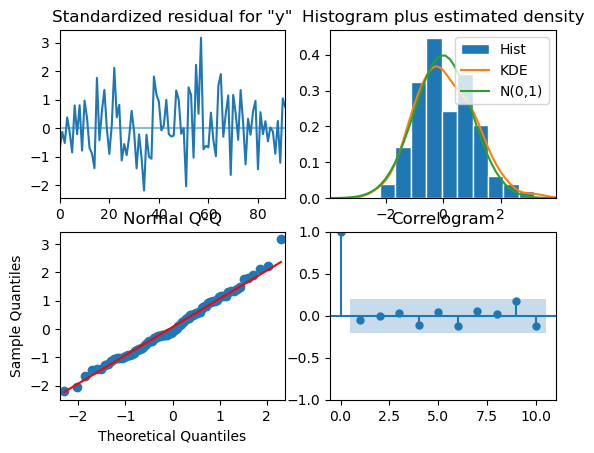

In [128]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [129]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,55.237925,13.907076,27.980558,82.495293
1,68.121917,13.990537,40.700967,95.542866
2,67.909503,14.011592,40.447288,95.371718
3,66.786313,14.098901,39.152974,94.419652
4,69.761684,14.108260,42.110002,97.413366


In [130]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

18.535865306004915


In [131]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(3,1,1),(3,0,2,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",62.560681


In [132]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

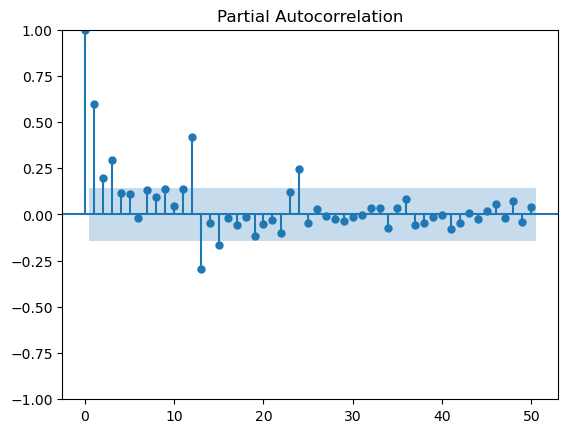

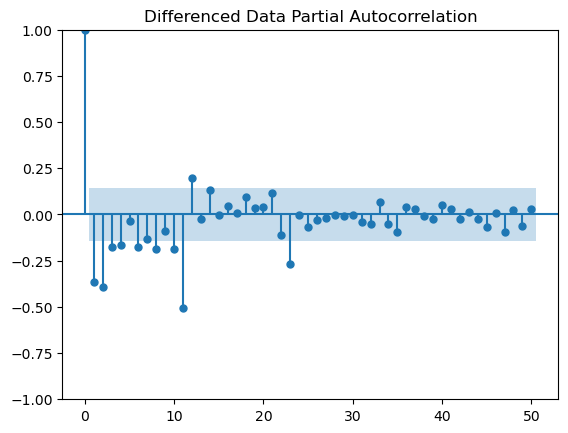

In [133]:
plot_pacf(df['Sales'],lags=50)
plot_pacf(df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

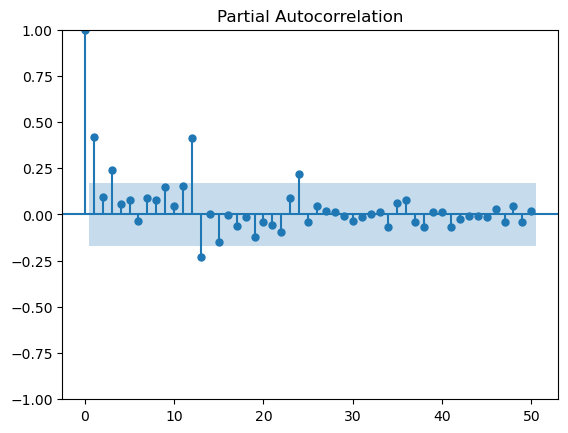

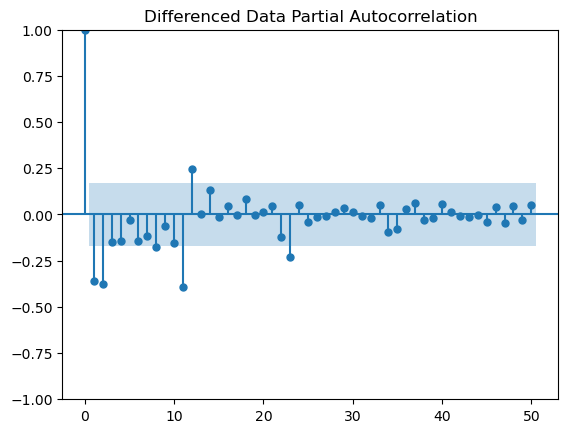

In [134]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [135]:
manual_ARIMA = ARIMA(train['Sales'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Wed, 17 Jan 2024   AIC                           1281.871
Time:                        12:27:48   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

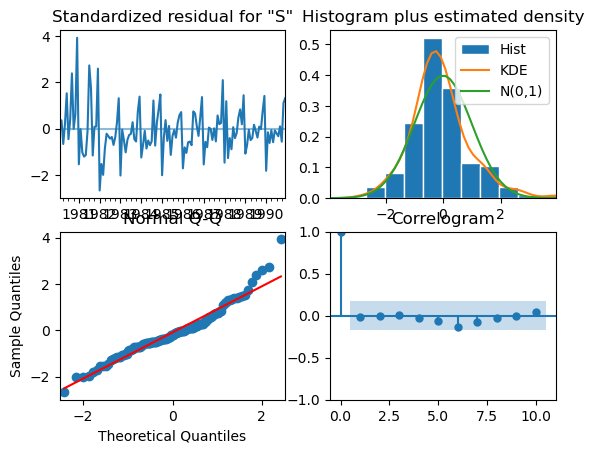

In [136]:
results_manual_ARIMA.plot_diagnostics();

In [137]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 36.47322488319227


In [138]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",62.560681


In [139]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [140]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19421D+00    |proj g|=  3.20368D-01


 This problem is unconstrained.



At iterate    5    f=  4.09304D+00    |proj g|=  1.42644D-02

At iterate   10    f=  4.08973D+00    |proj g|=  1.84485D-02

At iterate   15    f=  4.08352D+00    |proj g|=  1.10251D-02

At iterate   20    f=  4.07994D+00    |proj g|=  1.93732D-02

At iterate   25    f=  4.07601D+00    |proj g|=  2.14912D-03

At iterate   30    f=  4.07599D+00    |proj g|=  1.90739D-03

At iterate   35    f=  4.07589D+00    |proj g|=  1.55555D-03

At iterate   40    f=  4.07588D+00    |proj g|=  4.14369D-04

At iterate   45    f=  4.07588D+00    |proj g|=  1.67676D-04

At iterate   50    f=  4.07588D+00    |proj g|=  5.69106D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [141]:
SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_manual_SARIMA.aic},
                               ignore_index=True)
SARIMA_AIC

,param,seasonal,AIC
0,"(3, 1, 3)","(3, 0, 3, 12)",1094.03139


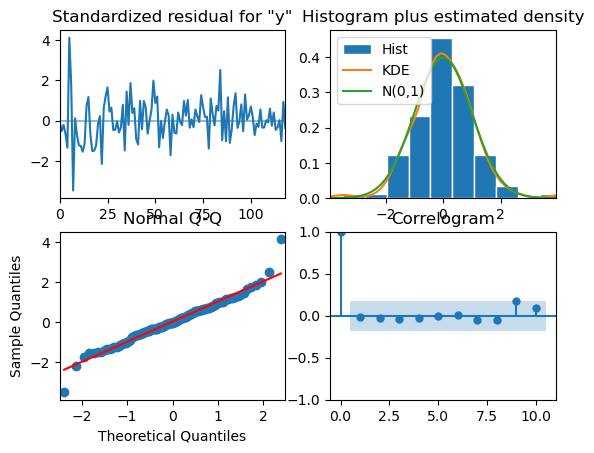

In [142]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [143]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,38.861444,21.080181,-2.454951,80.177839
1,65.277454,21.893856,22.366285,108.188623
2,60.206438,21.939812,17.205197,103.207679
3,59.297477,22.254231,15.679985,102.914969
4,60.594042,22.300574,16.885721,104.302363


In [144]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

14.975316463713977


In [145]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(2,1,2)(2,1,2,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",62.560681


In [146]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",8.992350
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"(2,1,2)(2,1,2,12),Manual_SARIMA",14.975316
"(3,1,1),(3,0,2,12),Auto_SARIMA",18.535865
Auto_ARIMA,36.418927
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"ARIMA(3,1,3)",36.473225


In [147]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [148]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [149]:
TES_train = df.copy()

In [150]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
alpha=0.2
beta=0.8
gamma=0.2
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

/Users/pavithra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [151]:
future_predictions['Sales_Predictions']=prediction
future_predictions

,Sales_Predictions
1995-08-01,36.096841
1995-09-01,34.999961
1995-10-01,36.289937
1995-11-01,43.126839
1995-12-01,61.593978
1996-01-01,24.293852
1996-02-01,31.406019
1996-03-01,37.545514
1996-04-01,39.735393
1996-05-01,33.753457


In [152]:
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,-6.382843,36.096841,78.576525
1995-09-01,-7.479723,34.999961,77.479645
1995-10-01,-6.189747,36.289937,78.769621
1995-11-01,0.647155,43.126839,85.606523
1995-12-01,19.114294,61.593978,104.073662


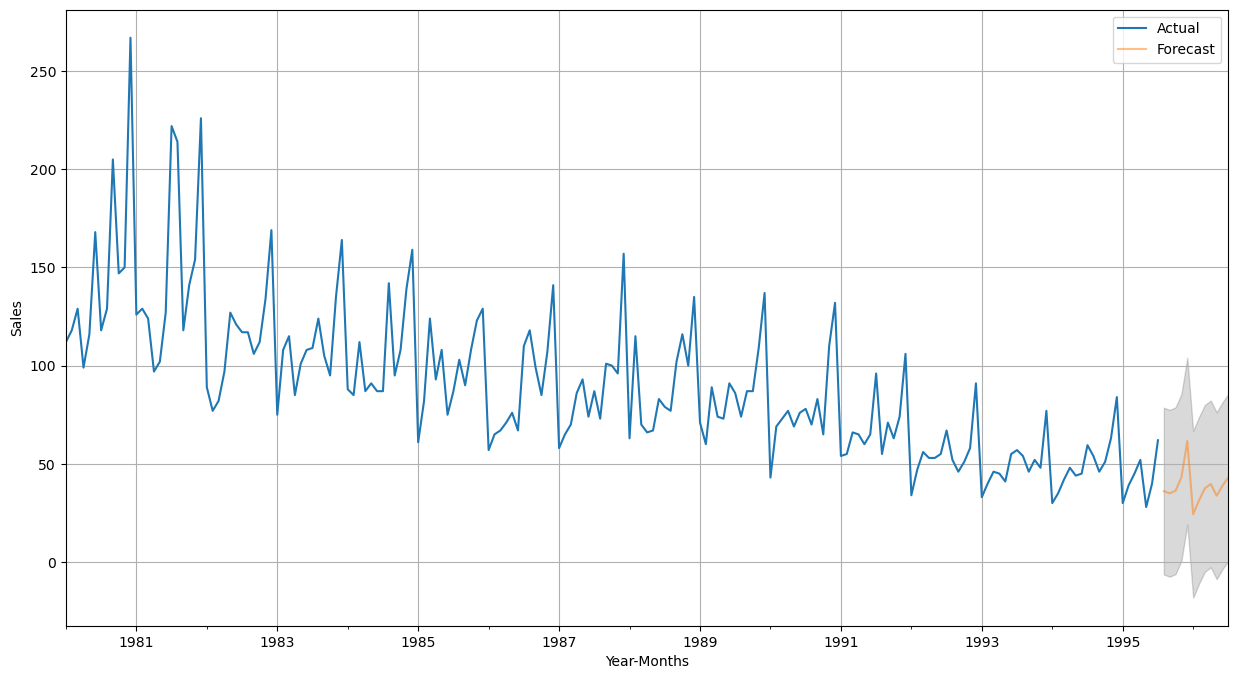

In [153]:
axis = df['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()